In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
from netCDF4 import Dataset
import glob
import datetime as dt
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from netCDF4 import date2num,num2date
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords

In [5]:
#start 25_6, end 26_0
#wrfout0 = Dataset('wrfout_d03_2018-03-25_00_00_00')
#wrfout1 = Dataset('wrfout_d03_2018-03-25_01_00_00')
#wrfout2 = Dataset('wrfout_d03_2018-03-25_02_00_00')
#wrfout3 = Dataset('wrfout_d03_2018-03-25_03_00_00')
#wrfout4 = Dataset('wrfout_d03_2018-03-25_04_00_00')
#wrfout5 = Dataset('wrfout_d03_2018-03-25_05_00_00')
wrfout6 = Dataset('wrfout_d03_2018-03-25_06_00_00')
wrfout7 = Dataset('wrfout_d03_2018-03-25_07_00_00')
wrfout8 = Dataset('wrfout_d03_2018-03-25_08_00_00')
wrfout9 = Dataset('wrfout_d03_2018-03-25_09_00_00')
wrfout10 = Dataset('wrfout_d03_2018-03-25_10_00_00')
wrfout11 = Dataset('wrfout_d03_2018-03-25_11_00_00')
wrfout12 = Dataset('wrfout_d03_2018-03-25_12_00_00')
wrfout13 = Dataset('wrfout_d03_2018-03-25_13_00_00')
wrfout14 = Dataset('wrfout_d03_2018-03-25_14_00_00')
wrfout15 = Dataset('wrfout_d03_2018-03-25_15_00_00')
wrfout16 = Dataset('wrfout_d03_2018-03-25_16_00_00')
wrfout17 = Dataset('wrfout_d03_2018-03-25_17_00_00')
wrfout18 = Dataset('wrfout_d03_2018-03-25_18_00_00')
wrfout19 = Dataset('wrfout_d03_2018-03-25_19_00_00')
wrfout20 = Dataset('wrfout_d03_2018-03-25_20_00_00')
wrfout21 = Dataset('wrfout_d03_2018-03-25_21_00_00')
wrfout22 = Dataset('wrfout_d03_2018-03-25_22_00_00')
wrfout23 = Dataset('wrfout_d03_2018-03-25_23_00_00')
wrfout24 = Dataset('wrfout_d03_2018-03-26_00_00_00')


In [7]:
#Wind speed
#uwind0 = getvar(wrfout0, "U")
#vwind0 = getvar(wrfout0, 'V')
xlat0 =getvar(wrfout8, "XLAT")
xlon0 = getvar(wrfout8, "XLONG")
xlatu0 = getvar(wrfout8, "XLAT_U")
xlonu0 =getvar(wrfout8, "XLONG_U")
xlatv0 = getvar(wrfout8, "XLAT_V")
xlonv0 = getvar(wrfout8, "XLONG_V")
#uwind1 = getvar(wrfout1, "U")
#vwind1 = getvar(wrfout1, 'V')
#uwind2 = getvar(wrfout2, "U")
#vwind2 = getvar(wrfout2, 'V')
#uwind3 = getvar(wrfout3, "U")
#vwind3 = getvar(wrfout3, 'V')
#uwind4 = getvar(wrfout4, "U")
#vwind4 = getvar(wrfout4, 'V')
#uwind5 = getvar(wrfout5, "U")
#vwind5 = getvar(wrfout5, 'V')
uwind6 = getvar(wrfout6, "U")
vwind6 = getvar(wrfout6, 'V')
uwind7 = getvar(wrfout7, "U")
vwind7 = getvar(wrfout7, 'V')
uwind8 = getvar(wrfout8, "U")
vwind8 = getvar(wrfout8, 'V')
uwind9 = getvar(wrfout9, "U")
vwind9 = getvar(wrfout9, 'V')
uwind10 = getvar(wrfout10, "U")
vwind10 = getvar(wrfout10, 'V')
uwind11 = getvar(wrfout11, "U")
vwind11 = getvar(wrfout11, 'V')
#uwind12 = getvar(wrfout12, "U")
#vwind12 = getvar(wrfout12, 'V')
uwind13 = getvar(wrfout13, "U")
vwind13 = getvar(wrfout13, 'V')
uwind14 = getvar(wrfout14, "U")
vwind14 = getvar(wrfout14, 'V')
uwind15 = getvar(wrfout15, "U")
vwind15 = getvar(wrfout15, 'V')
uwind16 = getvar(wrfout16, "U")
vwind16 = getvar(wrfout16, 'V')
uwind17 = getvar(wrfout17, "U")
vwind17 = getvar(wrfout17, 'V')
uwind18 = getvar(wrfout18, "U")
vwind18 = getvar(wrfout18, 'V')
uwind19 = getvar(wrfout19, "U")
vwind19 = getvar(wrfout19, 'V')
uwind20 = getvar(wrfout20, "U")
vwind20 = getvar(wrfout20, 'V')
uwind21 = getvar(wrfout21, "U")
vwind21 = getvar(wrfout21, 'V')
uwind22 = getvar(wrfout22, "U")
vwind22 = getvar(wrfout22, 'V')
uwind23 = getvar(wrfout23, "U")
vwind23 = getvar(wrfout23, 'V')
uwind24 = getvar(wrfout24, "U")
vwind24 = getvar(wrfout24, 'V')

#uwind_destag0 = wrf.destagger(uwind0, stagger_dim = 2)
#vwind_destag0 = wrf.destagger(vwind0, stagger_dim = 1)
#w_speed0 = np.sqrt((uwind_destag0**2)+(vwind_destag0**2))
xlatu_destag0 = wrf.destagger(xlatu0, stagger_dim =1)
xlonu_destag0 = wrf.destagger(xlonu0, stagger_dim =1)
xlatv_destag0 = wrf.destagger(xlatv0, stagger_dim =0)
xlonv_destag0 = wrf.destagger(xlonv0, stagger_dim =0)

#uwind_destag1 = wrf.destagger(uwind1, stagger_dim = 2)
#vwind_destag1 = wrf.destagger(vwind1, stagger_dim = 1)
#w_speed1 = np.sqrt((uwind_destag1**2)+(vwind_destag1**2))
#uwind_destag2 = wrf.destagger(uwind2, stagger_dim = 2)
#vwind_destag2 = wrf.destagger(vwind2, stagger_dim = 1)
#w_speed2 = np.sqrt((uwind_destag2**2)+(vwind_destag2**2))
#uwind_destag3 = wrf.destagger(uwind3, stagger_dim = 2)
#vwind_destag3 = wrf.destagger(vwind3, stagger_dim = 1)
#w_speed3 = np.sqrt((uwind_destag3**2)+(vwind_destag3**2))
#uwind_destag4 = wrf.destagger(uwind4, stagger_dim = 2)
#vwind_destag4 = wrf.destagger(vwind4, stagger_dim = 1)
#w_speed4 = np.sqrt((uwind_destag4**2)+(vwind_destag4**2))
#uwind_destag5 = wrf.destagger(uwind5, stagger_dim = 2)
#vwind_destag5 = wrf.destagger(vwind5, stagger_dim = 1)
#w_speed5 = np.sqrt((uwind_destag5**2)+(vwind_destag5**2))
uwind_destag6 = wrf.destagger(uwind6, stagger_dim = 2)
vwind_destag6 = wrf.destagger(vwind6, stagger_dim = 1)
w_speed6 = np.sqrt((uwind_destag6**2)+(vwind_destag6**2))
uwind_destag7 = wrf.destagger(uwind7, stagger_dim = 2)
vwind_destag7 = wrf.destagger(vwind7, stagger_dim = 1)
w_speed7 = np.sqrt((uwind_destag7**2)+(vwind_destag7**2))
uwind_destag8 = wrf.destagger(uwind8, stagger_dim = 2)
vwind_destag8 = wrf.destagger(vwind8, stagger_dim = 1)
w_speed8 = np.sqrt((uwind_destag8**2)+(vwind_destag8**2))
uwind_destag9 = wrf.destagger(uwind9, stagger_dim = 2)
vwind_destag9 = wrf.destagger(vwind9, stagger_dim = 1)
w_speed9 = np.sqrt((uwind_destag9**2)+(vwind_destag9**2))
uwind_destag10 = wrf.destagger(uwind10, stagger_dim = 2)
vwind_destag10 = wrf.destagger(vwind10, stagger_dim = 1)
w_speed10 = np.sqrt((uwind_destag10**2)+(vwind_destag10**2))
uwind_destag11 = wrf.destagger(uwind11, stagger_dim = 2)
vwind_destag11 = wrf.destagger(vwind11, stagger_dim = 1)
w_speed11 = np.sqrt((uwind_destag11**2)+(vwind_destag11**2))
#uwind_destag12 = wrf.destagger(uwind12, stagger_dim = 2)
#vwind_destag12 = wrf.destagger(vwind12, stagger_dim = 1)
#w_speed12 = np.sqrt((uwind_destag12**2)+(vwind_destag12**2))
uwind_destag13 = wrf.destagger(uwind13, stagger_dim = 2)
vwind_destag13 = wrf.destagger(vwind13, stagger_dim = 1)
w_speed13 = np.sqrt((uwind_destag13**2)+(vwind_destag13**2))
uwind_destag14 = wrf.destagger(uwind14, stagger_dim = 2)
vwind_destag14 = wrf.destagger(vwind14, stagger_dim = 1)
w_speed14 = np.sqrt((uwind_destag14**2)+(vwind_destag14**2))
uwind_destag15 = wrf.destagger(uwind15, stagger_dim = 2)
vwind_destag15 = wrf.destagger(vwind15, stagger_dim = 1)
w_speed15 = np.sqrt((uwind_destag15**2)+(vwind_destag15**2))
uwind_destag16 = wrf.destagger(uwind16, stagger_dim = 2)
vwind_destag16 = wrf.destagger(vwind16, stagger_dim = 1)
w_speed16 = np.sqrt((uwind_destag16**2)+(vwind_destag16**2))
uwind_destag17 = wrf.destagger(uwind17, stagger_dim = 2)
vwind_destag17 = wrf.destagger(vwind17, stagger_dim = 1)
w_speed17 = np.sqrt((uwind_destag17**2)+(vwind_destag17**2))
uwind_destag18 = wrf.destagger(uwind18, stagger_dim = 2)
vwind_destag18 = wrf.destagger(vwind18, stagger_dim = 1)
w_speed18 = np.sqrt((uwind_destag18**2)+(vwind_destag18**2))
uwind_destag19 = wrf.destagger(uwind19, stagger_dim = 2)
vwind_destag19 = wrf.destagger(vwind19, stagger_dim = 1)
w_speed19 = np.sqrt((uwind_destag19**2)+(vwind_destag19**2))
uwind_destag20 = wrf.destagger(uwind20, stagger_dim = 2)
vwind_destag20 = wrf.destagger(vwind20, stagger_dim = 1)
w_speed20 = np.sqrt((uwind_destag20**2)+(vwind_destag20**2))
uwind_destag21 = wrf.destagger(uwind21, stagger_dim = 2)
vwind_destag21 = wrf.destagger(vwind21, stagger_dim = 1)
w_speed21 = np.sqrt((uwind_destag21**2)+(vwind_destag21**2))
uwind_destag22 = wrf.destagger(uwind22, stagger_dim = 2)
vwind_destag22 = wrf.destagger(vwind22, stagger_dim = 1)
w_speed22 = np.sqrt((uwind_destag22**2)+(vwind_destag22**2))
uwind_destag23 = wrf.destagger(uwind23, stagger_dim = 2)
vwind_destag23 = wrf.destagger(vwind23, stagger_dim = 1)
w_speed23 = np.sqrt((uwind_destag23**2)+(vwind_destag23**2))
uwind_destag24 = wrf.destagger(uwind24, stagger_dim = 2)
vwind_destag24 = wrf.destagger(vwind24, stagger_dim = 1)
w_speed24 = np.sqrt((uwind_destag24**2)+(vwind_destag24**2))

'''
#perturbation temperature 
pert_t0 =getvar(wrfout0, 'T')
pert_t1 =getvar(wrfout1, 'T')
pert_t2 =getvar(wrfout2, 'T')
pert_t3 =getvar(wrfout3, 'T')
pert_t4 =getvar(wrfout4, 'T')
pert_t5 =getvar(wrfout5, 'T')
pert_t6 =getvar(wrfout6, 'T')
pert_t7 =getvar(wrfout7, 'T')
pert_t8 =getvar(wrfout8, 'T')
pert_t9 =getvar(wrfout9, 'T')
pert_t10 =getvar(wrfout10, 'T')
pert_t11 =getvar(wrfout11, 'T')
pert_t12 =getvar(wrfout12, 'T')
pert_t13 =getvar(wrfout13, 'T')
pert_t14 =getvar(wrfout14, 'T')
pert_t15 =getvar(wrfout15, 'T')
pert_t16 =getvar(wrfout16, 'T')
pert_t17 =getvar(wrfout17, 'T')
pert_t18 =getvar(wrfout18, 'T')
pert_t19 =getvar(wrfout19, 'T')
pert_t20 =getvar(wrfout20, 'T')
pert_t21 =getvar(wrfout21, 'T')
pert_t22 =getvar(wrfout22, 'T')
pert_t23 =getvar(wrfout23, 'T')
pert_t24 =getvar(wrfout24, 'T')

#reference T
ref_t0 =getvar(wrfout0, 'T00')
ref_t1 =getvar(wrfout1, 'T00')
ref_t2 =getvar(wrfout2, 'T00')
ref_t3 =getvar(wrfout3, 'T00')
ref_t4 =getvar(wrfout4, 'T00')
ref_t5 =getvar(wrfout5, 'T00')
ref_t6 =getvar(wrfout6, 'T00')
ref_t7 =getvar(wrfout7, 'T00')
ref_t8 =getvar(wrfout8, 'T00')
ref_t9 =getvar(wrfout9, 'T00')
ref_t10 =getvar(wrfout10, 'T00')
ref_t11 =getvar(wrfout11, 'T00')
ref_t12 =getvar(wrfout12, 'T00')
ref_t13 =getvar(wrfout13, 'T00')
ref_t14 =getvar(wrfout14, 'T00')
ref_t15 =getvar(wrfout15, 'T00')
ref_t16 =getvar(wrfout16, 'T00')
ref_t17 =getvar(wrfout17, 'T00')
ref_t18 =getvar(wrfout18, 'T00')
ref_t19 =getvar(wrfout19, 'T00')
ref_t20 =getvar(wrfout20, 'T00')
ref_t21 =getvar(wrfout21, 'T00')
ref_t22 =getvar(wrfout22, 'T00')
ref_t23 =getvar(wrfout23, 'T00')
ref_t24 =getvar(wrfout24, 'T00')

#full T
full_t0 = pert_t0 + ref_t0 
full_t1 = pert_t1 + ref_t1 
full_t2 = pert_t2 + ref_t2 
full_t3 = pert_t3 + ref_t3 
full_t4 = pert_t4 + ref_t4 
full_t5 = pert_t5 + ref_t5
full_t6 = pert_t6 + ref_t6
full_t7 = pert_t7 + ref_t7 
full_t8 = pert_t8 + ref_t8 
full_t9 = pert_t9 + ref_t9 
full_t10 = pert_t10 + ref_t10 
full_t11 = pert_t11 + ref_t11 
full_t12 = pert_t12 + ref_t12
full_t13 = pert_t13 + ref_t13
full_t14 = pert_t14 + ref_t14 
full_t15 = pert_t15 + ref_t15 
full_t16 = pert_t16 + ref_t16 
full_t17 = pert_t17 + ref_t17 
full_t18 = pert_t18 + ref_t18
full_t19 = pert_t19 + ref_t19
full_t20 = pert_t20 + ref_t20
full_t21 = pert_t21 + ref_t21 
full_t22 = pert_t22 + ref_t22 
full_t23 = pert_t23 + ref_t23 
full_t24 = pert_t24 + ref_24 

#perturbation pressure
pert_p0 = getvar(wrfout0, 'P')
pert_p1 = getvar(wrfout1, 'P')
pert_p2 = getvar(wrfout2, 'P')
pert_p3 = getvar(wrfout3, 'P')
pert_p4 = getvar(wrfout4, 'P')
pert_p5 = getvar(wrfout5, 'P')
pert_p6 = getvar(wrfout6, 'P')
pert_p7 = getvar(wrfout7, 'P')
pert_p8 = getvar(wrfout8, 'P')
pert_p9 = getvar(wrfout9, 'P')
pert_p10 = getvar(wrfout10, 'P')
pert_p11 = getvar(wrfout11, 'P')
pert_p12 = getvar(wrfout12, 'P')
pert_p13 = getvar(wrfout13, 'P')
pert_p14 = getvar(wrfout14, 'P')
pert_p15 = getvar(wrfout15, 'P')
pert_p16 = getvar(wrfout16, 'P')
pert_p17 = getvar(wrfout17, 'P')
pert_p18 = getvar(wrfout18, 'P')
pert_p19 = getvar(wrfout19, 'P')
pert_p20 = getvar(wrfout20, 'P')
pert_p21 = getvar(wrfout21, 'P')
pert_p22 = getvar(wrfout22, 'P')
pert_p23 = getvar(wrfout23, 'P')
pert_p24 = getvar(wrfout24, 'P')

#base pressure
base_p0 = getvar(wrfout0, 'P00')
base_p1 = getvar(wrfout1, 'P00')
base_p2 = getvar(wrfout2, 'P00')
base_p3 = getvar(wrfout3, 'P00')
base_p4 = getvar(wrfout4, 'P00')
base_p5 = getvar(wrfout5, 'P00')
base_p6 = getvar(wrfout6, 'P00')
base_p7 = getvar(wrfout7, 'P00')
base_p8 = getvar(wrfout8, 'P00')
base_p9 = getvar(wrfout9, 'P00')
base_p10 = getvar(wrfout10, 'P00')
base_p11 = getvar(wrfout11, 'P00')
base_p12 = getvar(wrfout12, 'P00')
base_p13 = getvar(wrfout13, 'P00')
base_p14 = getvar(wrfout14, 'P00')
base_p15 = getvar(wrfout15, 'P00')
base_p16 = getvar(wrfout16, 'P00')
base_p17 = getvar(wrfout17, 'P00')
base_p18 = getvar(wrfout18, 'P00')
base_p19 = getvar(wrfout19, 'P00')
base_p20 = getvar(wrfout20, 'P00')
base_p21 = getvar(wrfout21, 'P00')
base_p22 = getvar(wrfout22, 'P00')
base_p23 = getvar(wrfout23, 'P00')
base_p24 = getvar(wrfout34, 'P00')

#full pressure
full_p0 = pert_p0 + base_p0 
full_p1 = pert_p1 + base_p1 
full_p2 = pert_p2 + base_p2 
full_p3 = pert_p3 + base_p3 
full_p4 = pert_p4 + base_p4 
full_p5 = pert_p5 + base_p5
full_p6 = pert_p6 + base_p6
full_p7 = pert_p7 + base_p7 
full_p8 = pert_p8 + base_p8 
full_p9 = pert_p9 + base_p9 
full_p10 = pert_p10 + base_p10 
full_p11 = pert_p11 + base_p11 
full_p12 = pert_p12 + base_p12
full_p13 = pert_p13 + base_p13
full_p14 = pert_p14 + base_p14 
full_p15 = pert_p15 + base_p15 
full_p16 = pert_p16 + base_p16 
full_p17 = pert_p17 + base_p17 
full_p18 = pert_p18 + base_p18 
full_p19 = pert_p19 + base_p19
full_p20 = pert_p20 + base_p20
full_p21 = pert_p21 + base_p21 
full_p22 = pert_p22 + base_p22 
full_p23 = pert_p23 + base_p23 
full_p24 = pert_p24 + base_p24 

#TEMPERATURE!!!!!!
#wrf.tk(pres, theta, meta=True, units='K')
temp0 = wrf.tk(full_p0, full_t0, meta=True, units='K')
temp1 = wrf.tk(full_p1, full_t1, meta=True, units='K')
temp2 = wrf.tk(full_p2, full_t2, meta=True, units='K')
temp3 = wrf.tk(full_p3, full_t3, meta=True, units='K')
temp4 = wrf.tk(full_p4, full_t4, meta=True, units='K')
temp5 = wrf.tk(full_p5, full_t5, meta=True, units='K')
temp6 = wrf.tk(full_p6, full_t6, meta=True, units='K')
temp7 = wrf.tk(full_p7, full_t7, meta=True, units='K')
temp8 = wrf.tk(full_p8, full_t8, meta=True, units='K')
temp9 = wrf.tk(full_p9, full_t9, meta=True, units='K')
temp10 = wrf.tk(full_p10, full_t10, meta=True, units='K')
temp11 = wrf.tk(full_p11, full_t11, meta=True, units='K')
temp12 = wrf.tk(full_p12, full_t12, meta=True, units='K')
temp13 = wrf.tk(full_p13, full_t13, meta=True, units='K')
temp14 = wrf.tk(full_p14, full_t14, meta=True, units='K')
temp15 = wrf.tk(full_p15, full_t15, meta=True, units='K')
temp16 = wrf.tk(full_p16, full_t16, meta=True, units='K')
temp17 = wrf.tk(full_p17, full_t17, meta=True, units='K')
temp18 = wrf.tk(full_p18, full_t18, meta=True, units='K')
temp19 = wrf.tk(full_p19, full_t19, meta=True, units='K')
temp20 = wrf.tk(full_p20, full_t20, meta=True, units='K')
temp21 = wrf.tk(full_p21, full_t21, meta=True, units='K')
temp22 = wrf.tk(full_p22, full_t22, meta=True, units='K')
temp23 = wrf.tk(full_p23, full_t23, meta=True, units='K')
temp24 = wrf.tk(full_p24, full_t24, meta=True, units='K')

#equiolent potential temperature 
thetae0 = wrf.eth(qv0, temp0, full_p0, meta=True, units='K')
thetae1 = wrf.eth(qv1, temp1, full_p1, meta=True, units='K')
thetae2 = wrf.eth(qv2, temp2, full_p2, meta=True, units='K')
thetae3 = wrf.eth(qv3, temp3, full_p3, meta=True, units='K')
thetae4 = wrf.eth(qv4, temp4, full_p4, meta=True, units='K')
thetae5 = wrf.eth(qv5, temp5, full_p5, meta=True, units='K')
thetae6 = wrf.eth(qv6, temp6, full_p6, meta=True, units='K')
thetae7 = wrf.eth(qv7, temp7, full_p7, meta=True, units='K')
thetae8 = wrf.eth(qv8, temp8, full_p8, meta=True, units='K')
thetae9 = wrf.eth(qv9, temp9, full_p9, meta=True, units='K')
thetae10 = wrf.eth(qv10, temp10, full_p10, meta=True, units='K')
thetae11 = wrf.eth(qv11, temp11, full_p11, meta=True, units='K')
thetae12 = wrf.eth(qv12, temp12, full_p12, meta=True, units='K')
thetae13 = wrf.eth(qv13, temp13, full_p13, meta=True, units='K')
thetae14 = wrf.eth(qv14, temp14, full_p14, meta=True, units='K')
thetae15 = wrf.eth(qv15, temp15, full_p15, meta=True, units='K')
thetae16 = wrf.eth(qv16, temp16, full_p16, meta=True, units='K')
thetae17 = wrf.eth(qv17, temp17, full_p17, meta=True, units='K')
thetae18 = wrf.eth(qv18, temp18, full_p18, meta=True, units='K')
thetae19 = wrf.eth(qv19, temp19, full_p19, meta=True, units='K')
thetae20 = wrf.eth(qv20, temp20, full_p20, meta=True, units='K')
thetae21 = wrf.eth(qv21, temp21, full_p21, meta=True, units='K')
thetae22 = wrf.eth(qv22, temp22, full_p22, meta=True, units='K')
thetae23 = wrf.eth(qv23, temp23, full_p23, meta=True, units='K')
thetae24 = wrf.eth(qv24, temp24, full_p24, meta=True, units='K')
'''

"\n#perturbation temperature \npert_t0 =getvar(wrfout0, 'T')\npert_t1 =getvar(wrfout1, 'T')\npert_t2 =getvar(wrfout2, 'T')\npert_t3 =getvar(wrfout3, 'T')\npert_t4 =getvar(wrfout4, 'T')\npert_t5 =getvar(wrfout5, 'T')\npert_t6 =getvar(wrfout6, 'T')\npert_t7 =getvar(wrfout7, 'T')\npert_t8 =getvar(wrfout8, 'T')\npert_t9 =getvar(wrfout9, 'T')\npert_t10 =getvar(wrfout10, 'T')\npert_t11 =getvar(wrfout11, 'T')\npert_t12 =getvar(wrfout12, 'T')\npert_t13 =getvar(wrfout13, 'T')\npert_t14 =getvar(wrfout14, 'T')\npert_t15 =getvar(wrfout15, 'T')\npert_t16 =getvar(wrfout16, 'T')\npert_t17 =getvar(wrfout17, 'T')\npert_t18 =getvar(wrfout18, 'T')\npert_t19 =getvar(wrfout19, 'T')\npert_t20 =getvar(wrfout20, 'T')\npert_t21 =getvar(wrfout21, 'T')\npert_t22 =getvar(wrfout22, 'T')\npert_t23 =getvar(wrfout23, 'T')\npert_t24 =getvar(wrfout24, 'T')\n\n#reference T\nref_t0 =getvar(wrfout0, 'T00')\nref_t1 =getvar(wrfout1, 'T00')\nref_t2 =getvar(wrfout2, 'T00')\nref_t3 =getvar(wrfout3, 'T00')\nref_t4 =getvar(wrfou

C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


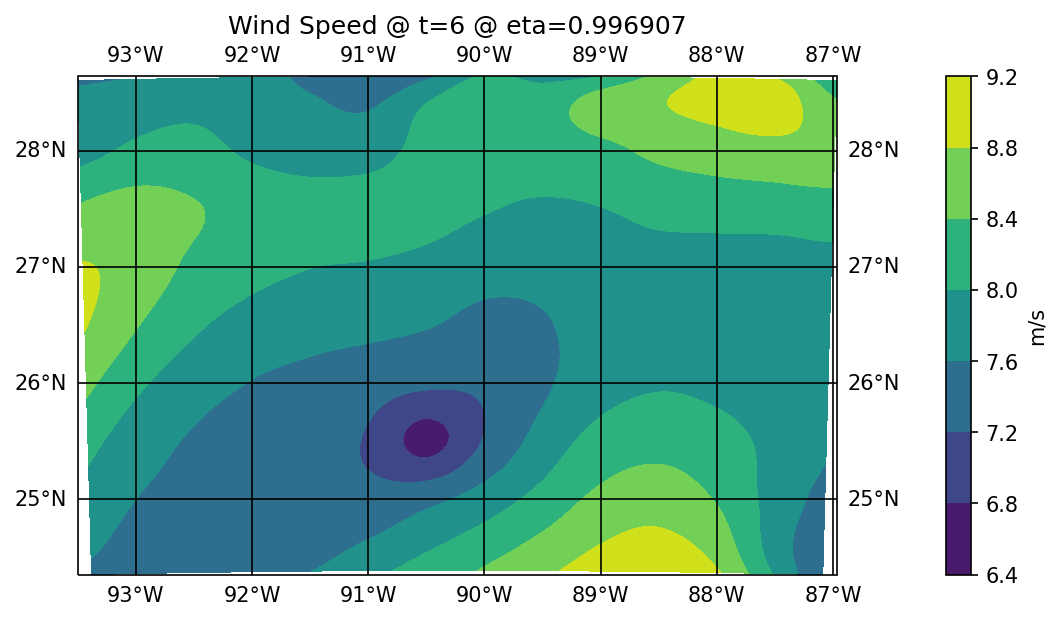

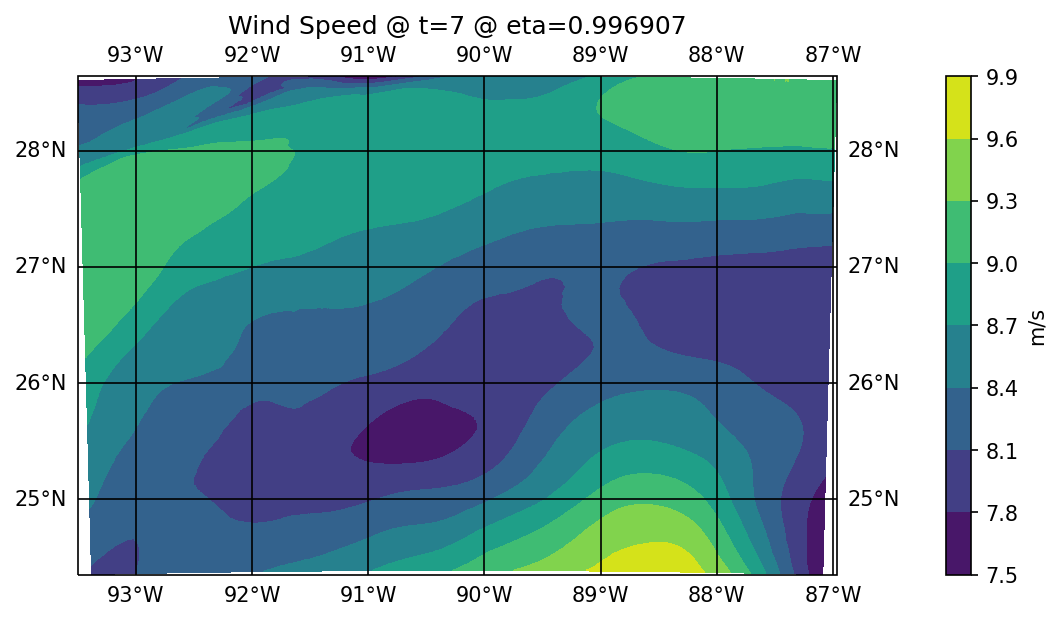

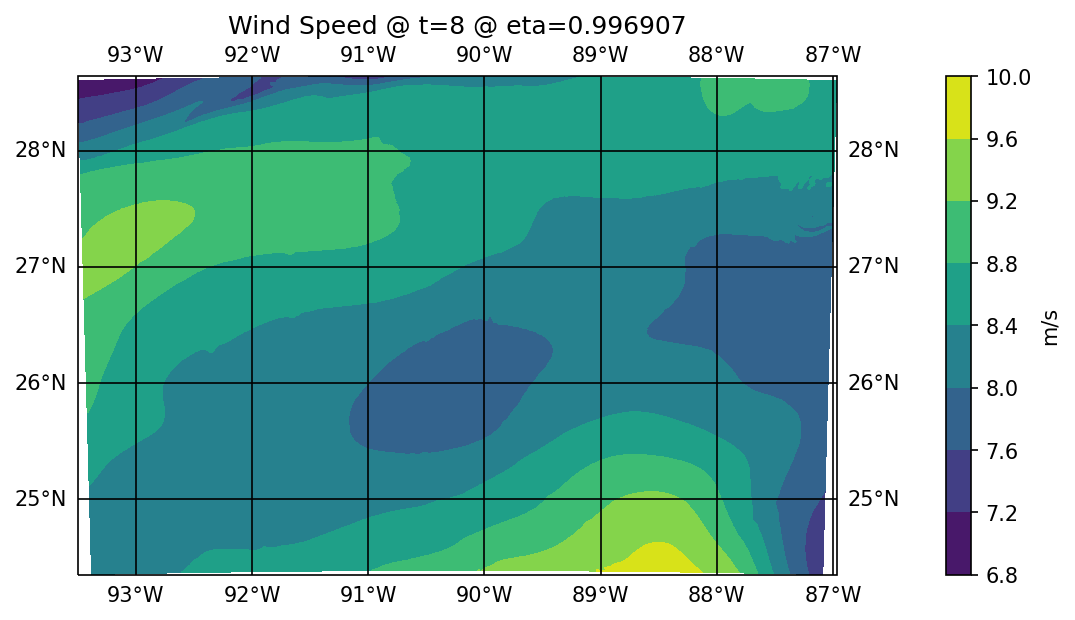

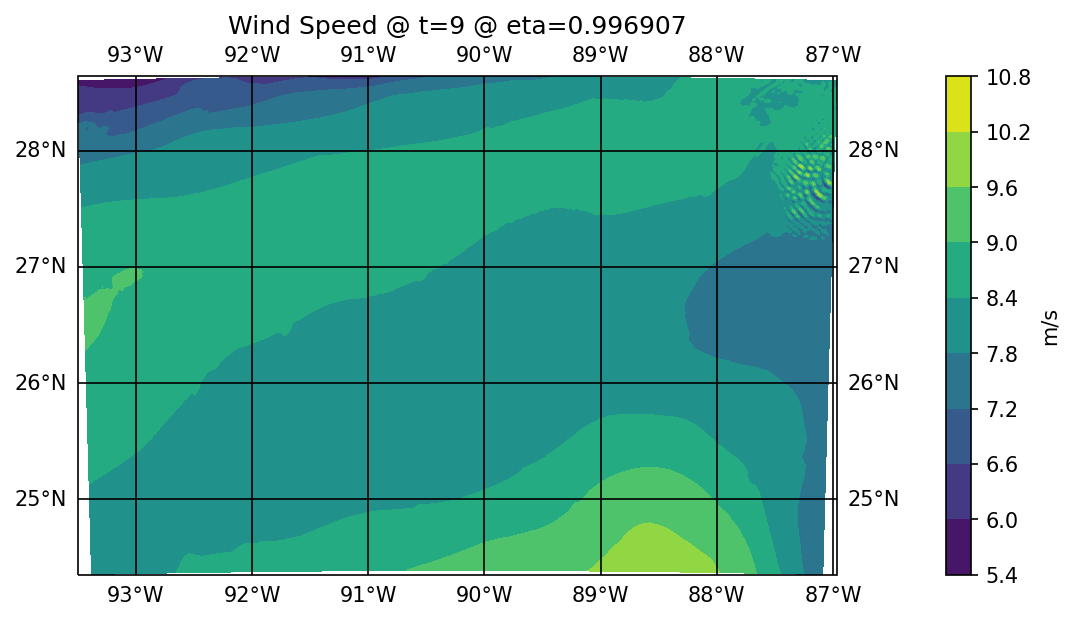

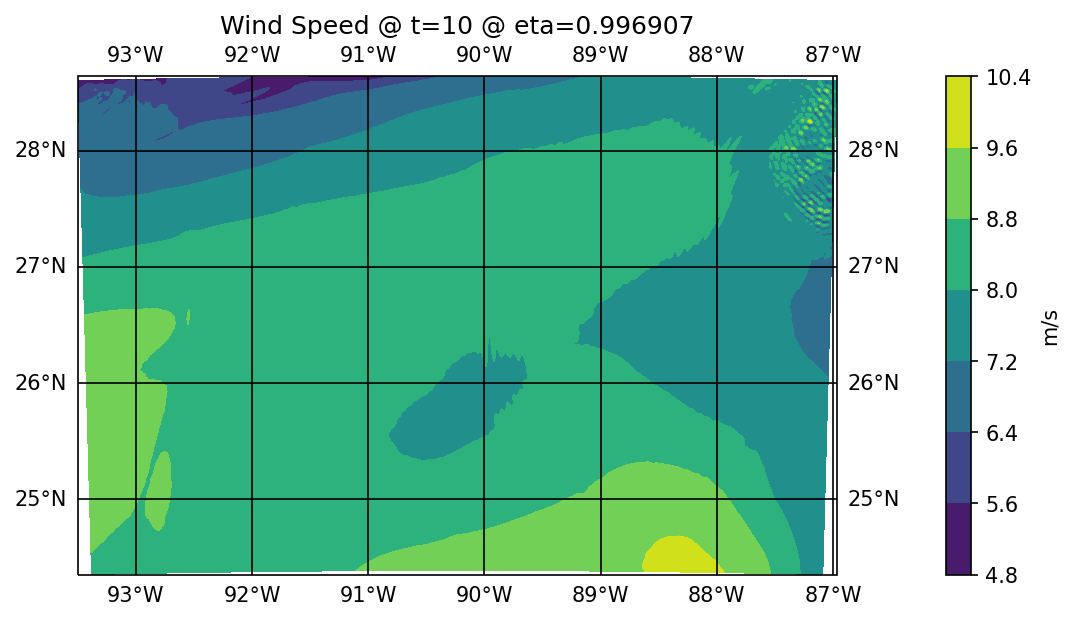

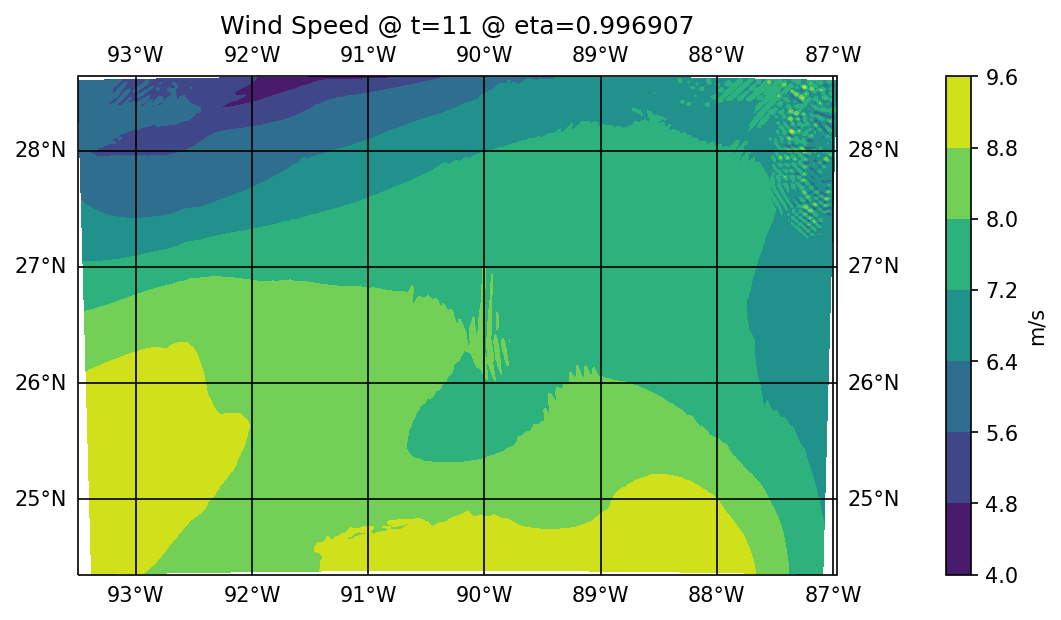

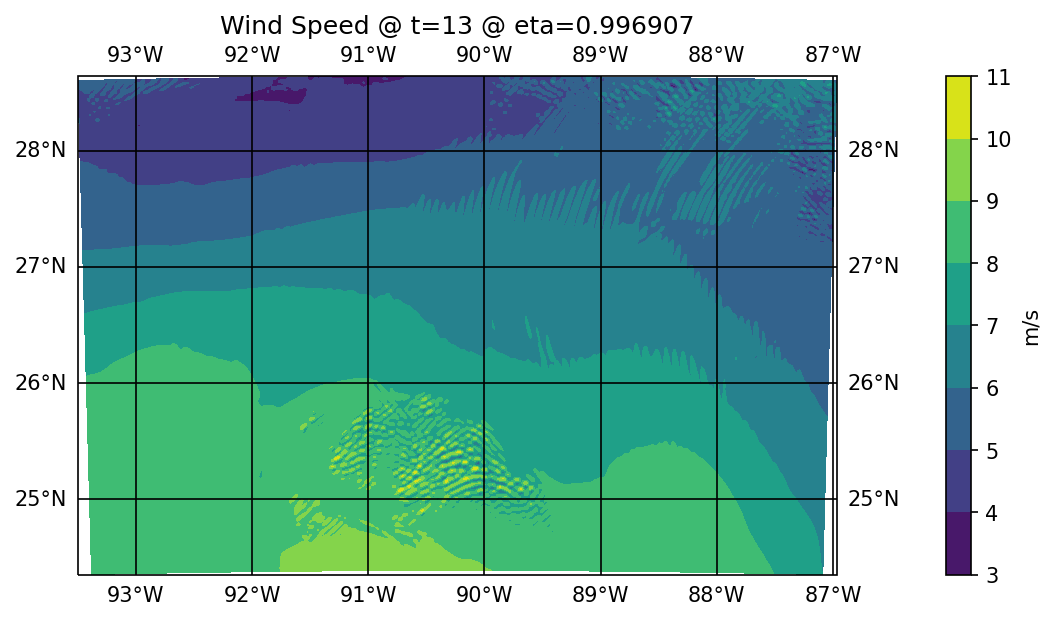

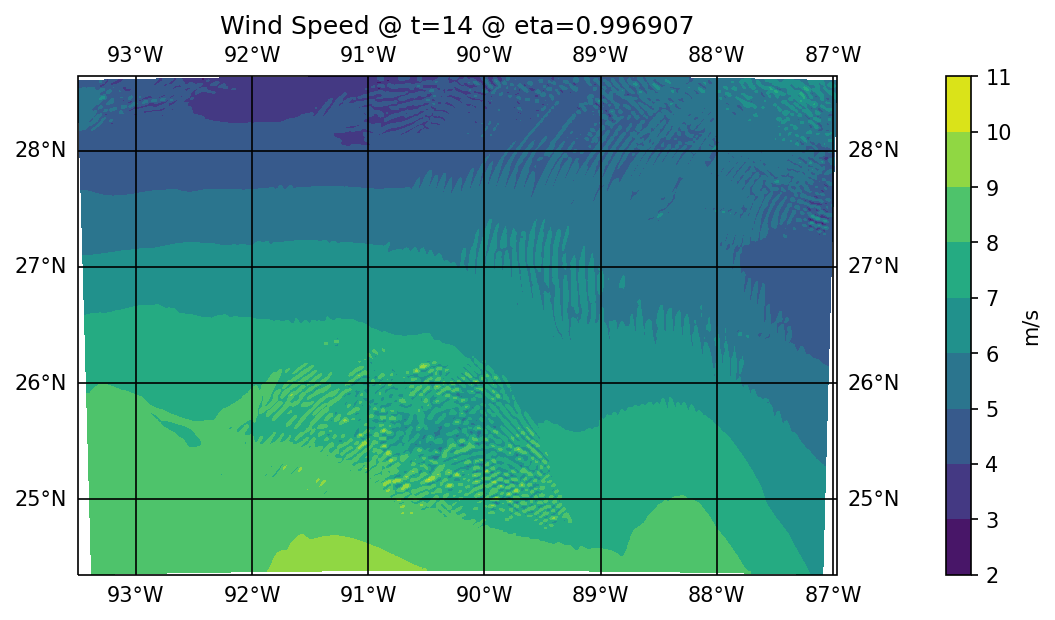

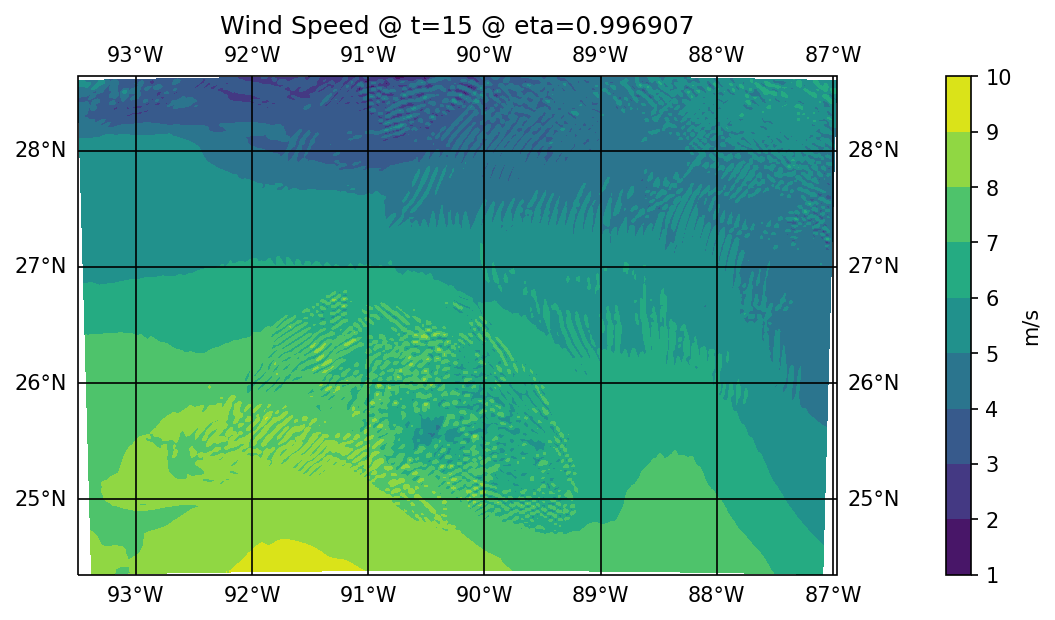

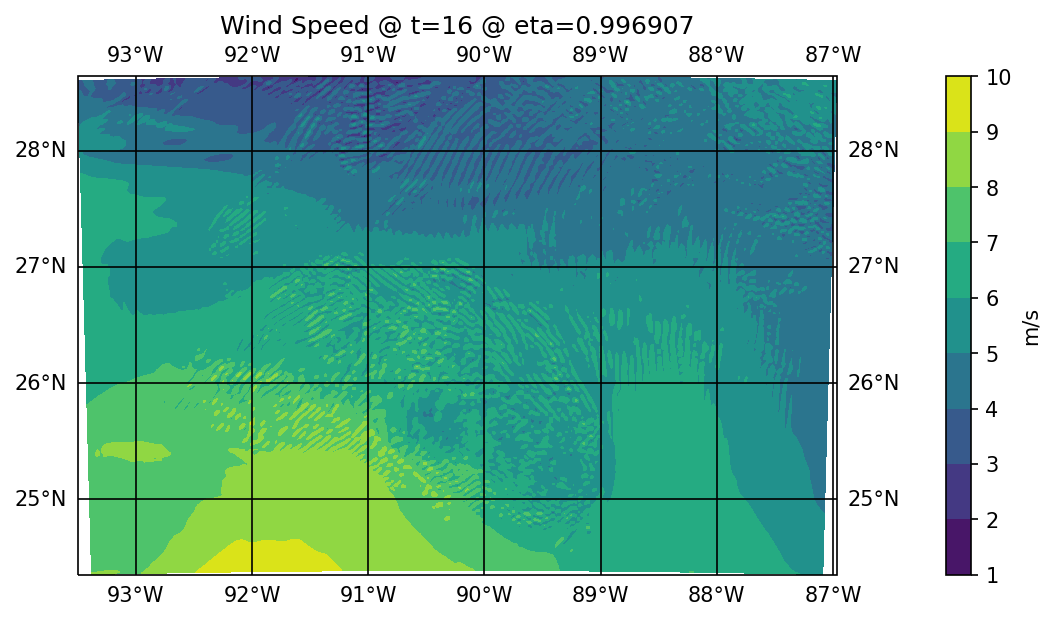

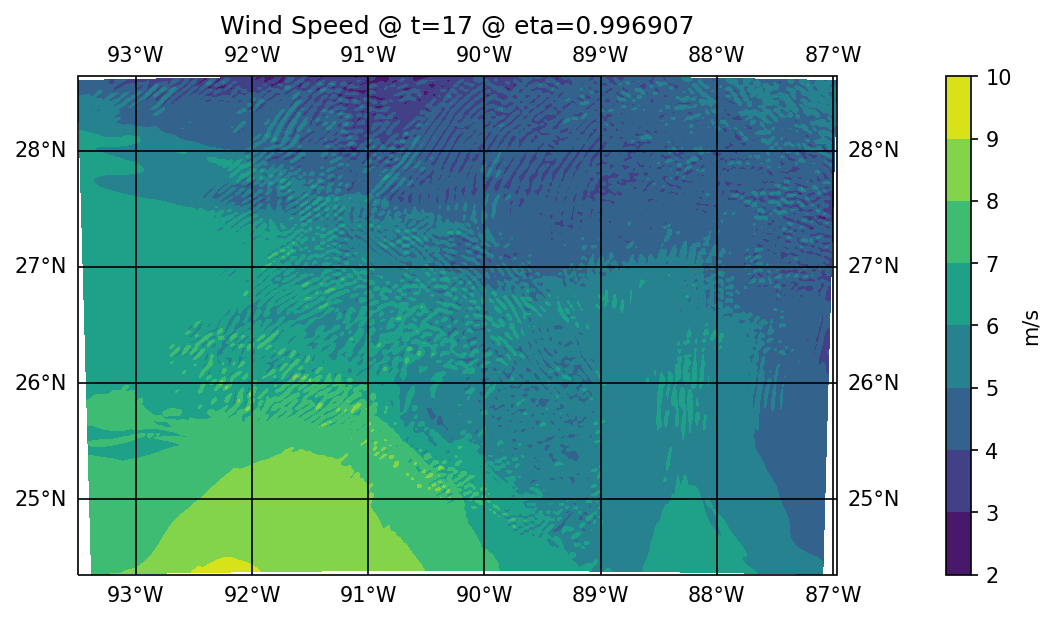

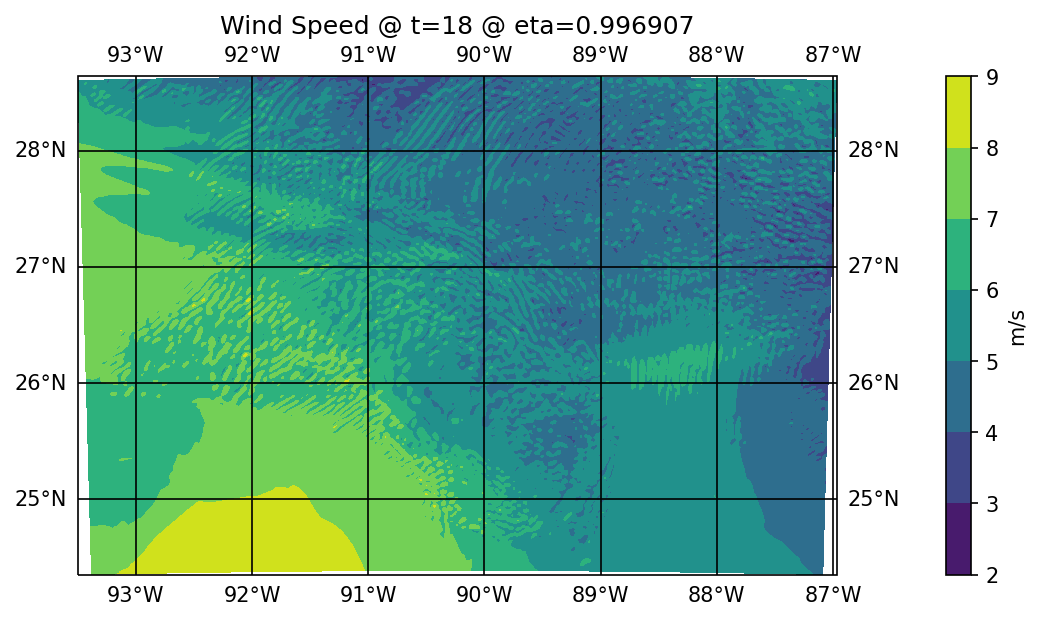

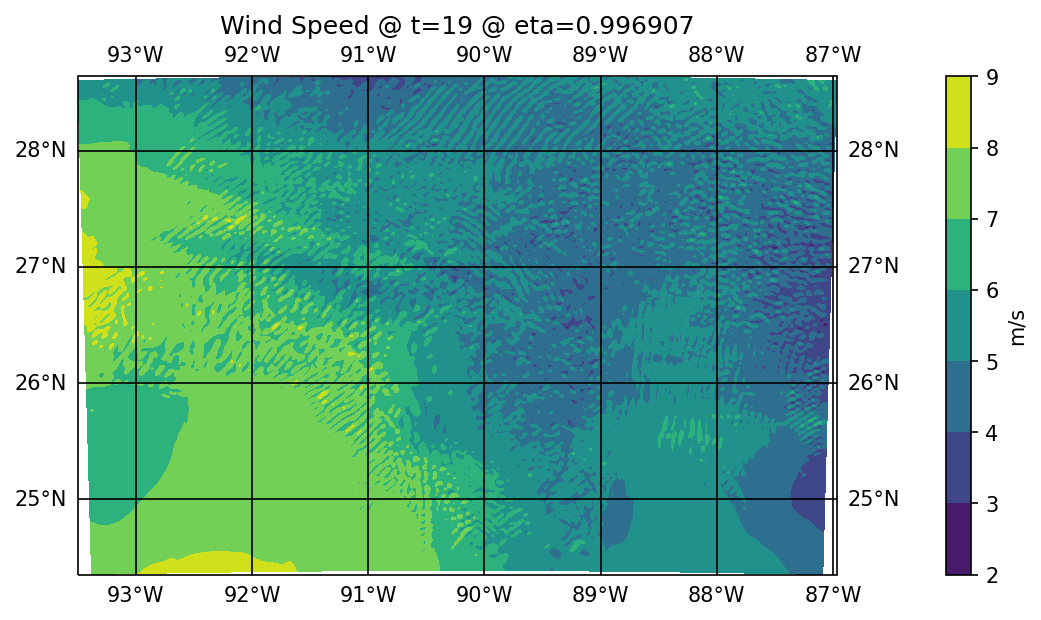

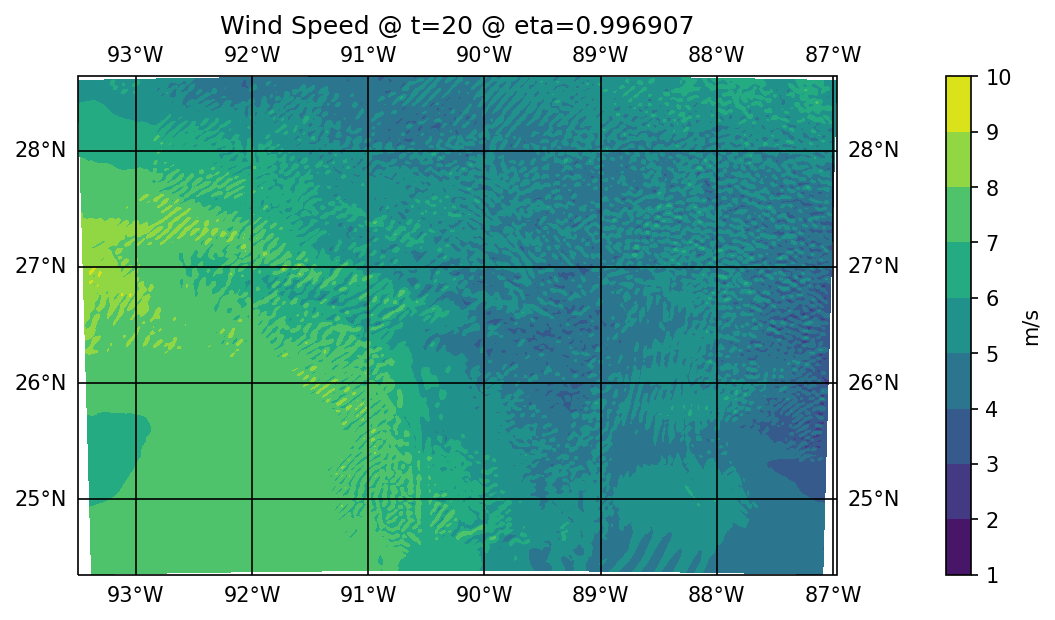

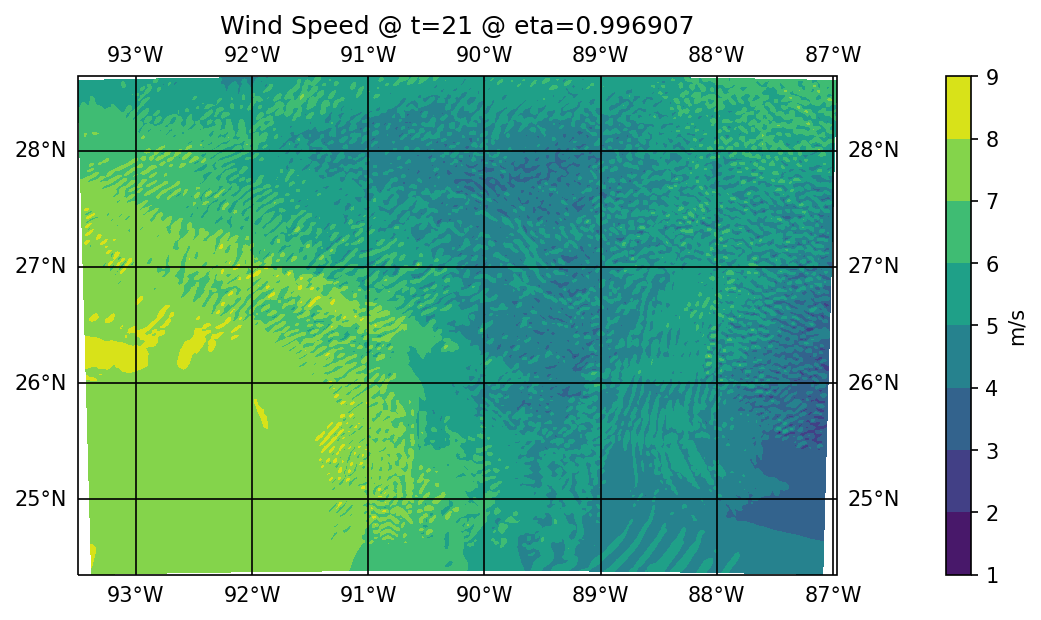

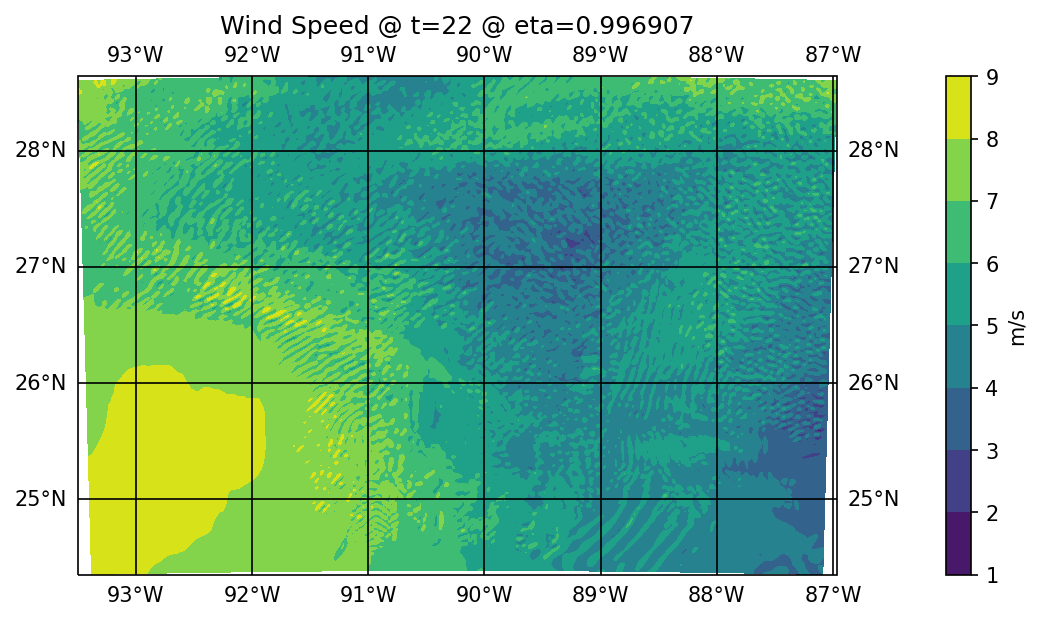

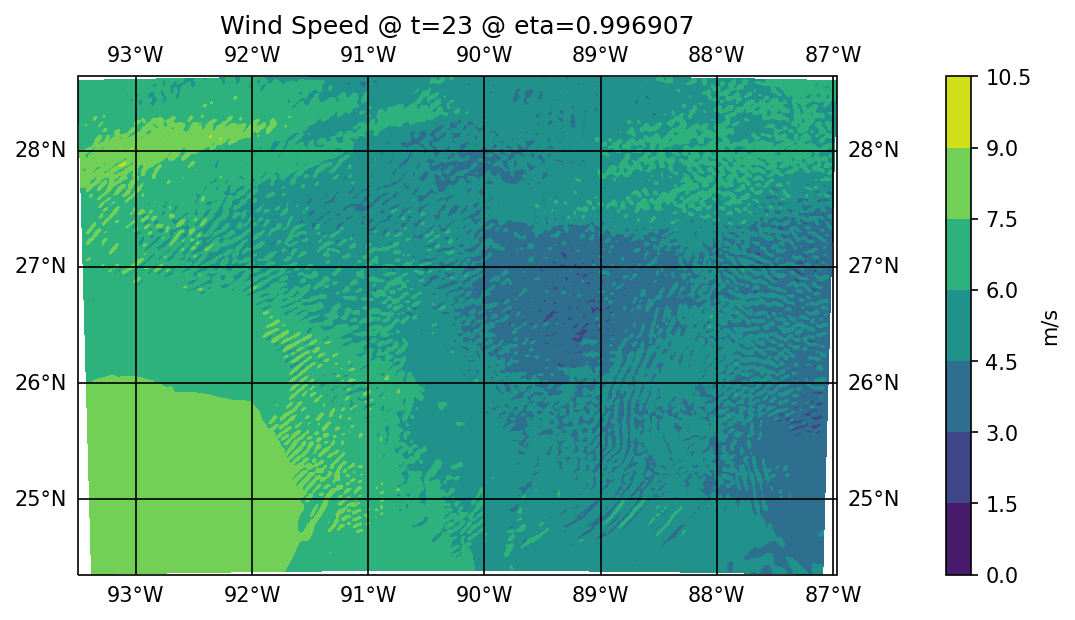

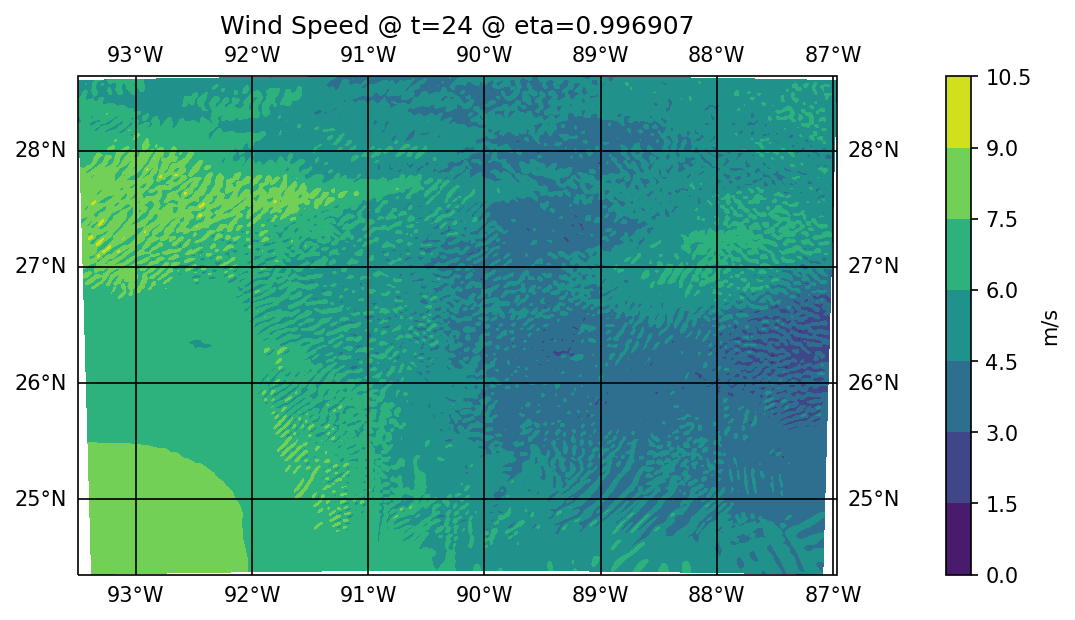

In [8]:
#wind speed, eta = 0
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed0[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=0 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed0_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed1[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=1@ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed1_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed2[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=2 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed2_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed3[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=3 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed3_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed4[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=4 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed4_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed5[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=5 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed5_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed6[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=6 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed6_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed7[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=7 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed7_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed8[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=8 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed8_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed9[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=9 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed9_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed10[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=10 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed10_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed11[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=11 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed11_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed12[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=12 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed12_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed13[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=13 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed13_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed14[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=14 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed14_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed15[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=15 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed15_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed16[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=16 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed16_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed17[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=17 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed17_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed18[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=18 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed18_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed19[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=19 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed19_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed20[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=20 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed20_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed21[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=21 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed21_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed22[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=22 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed22_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed23[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=23 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed23_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed24[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=24 @ eta=0.996907')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed24_eta0.png', bbox_inches = 'tight',dpi = 150)
plt.show()


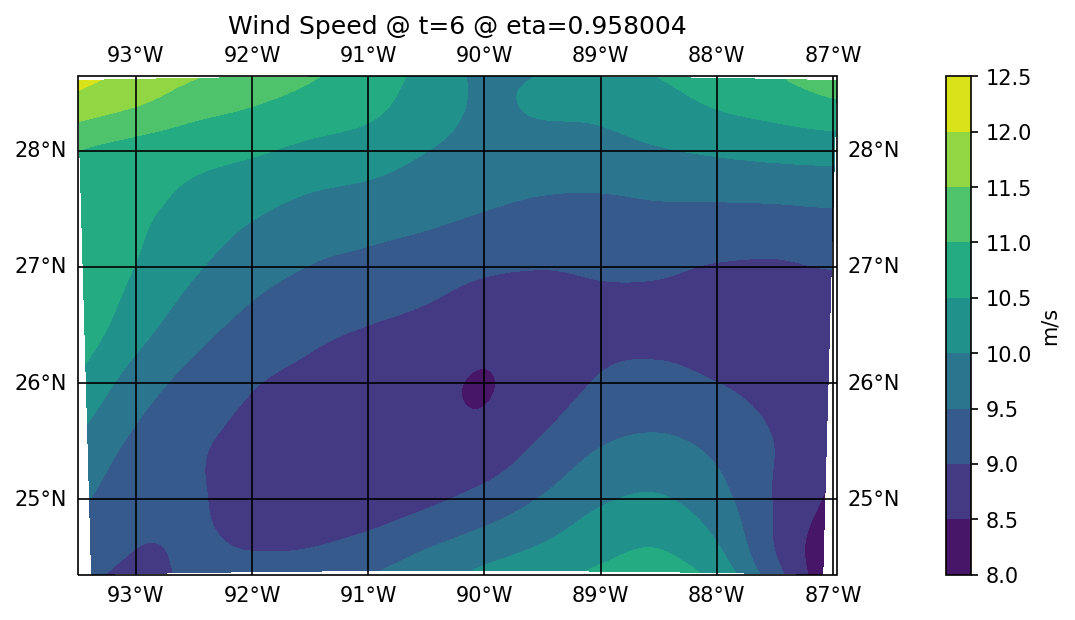

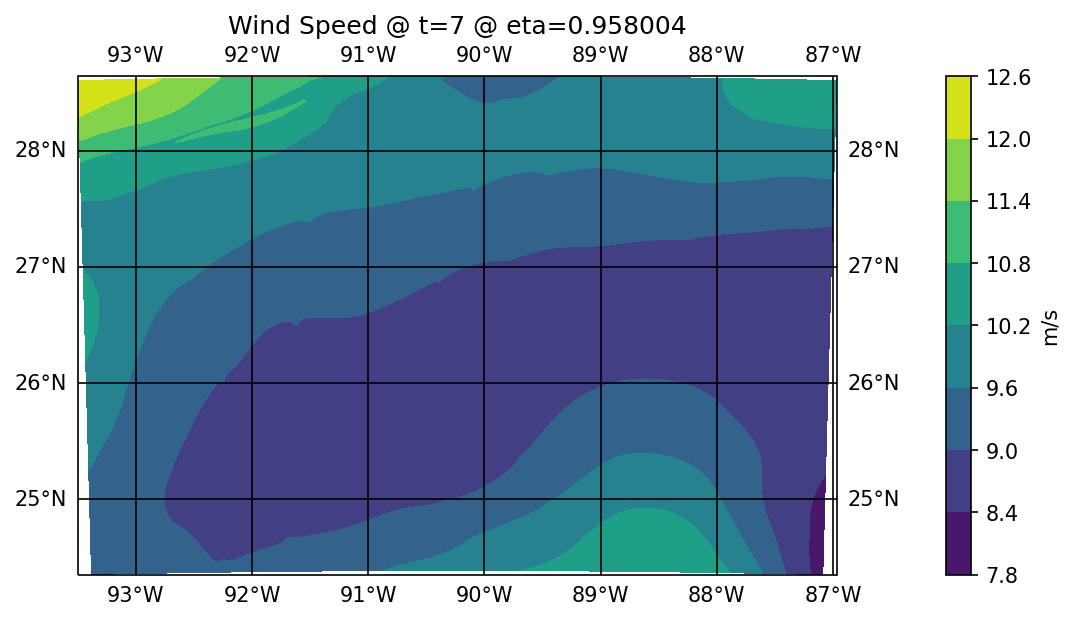

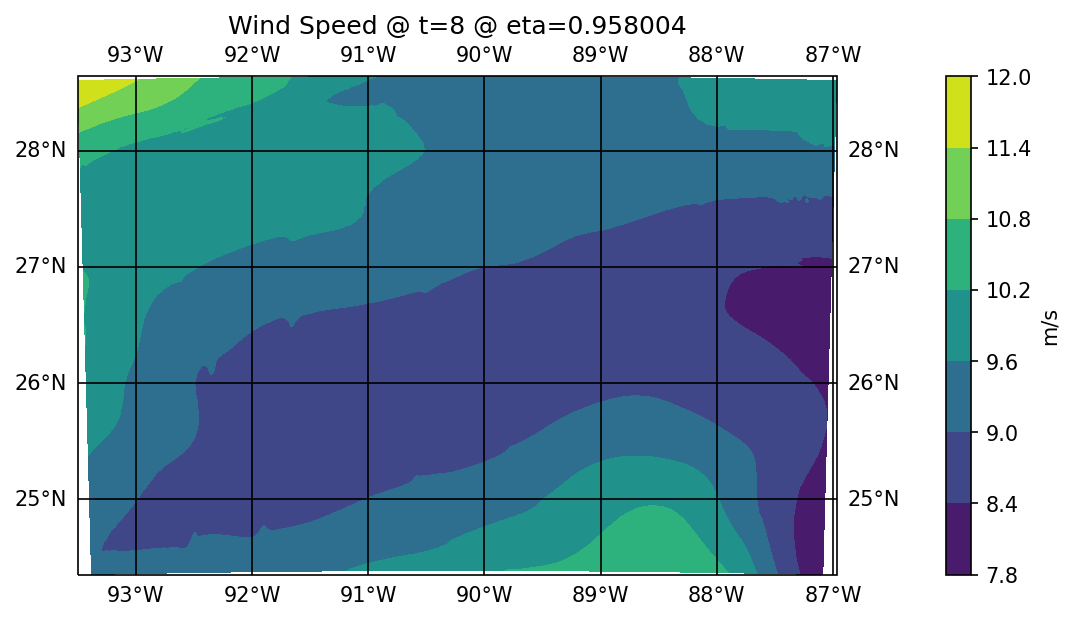

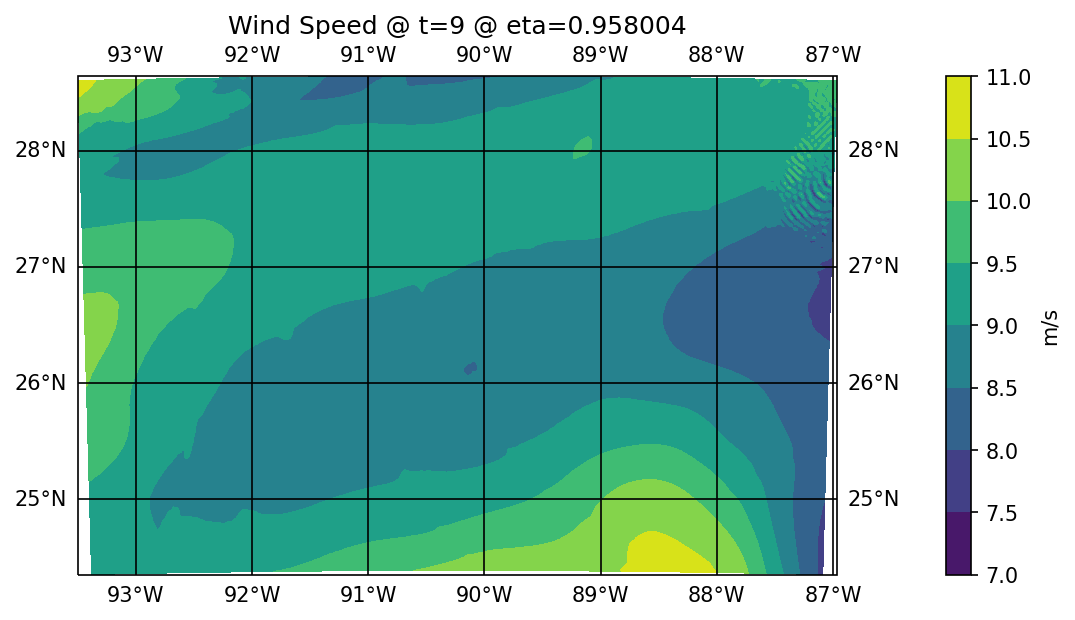

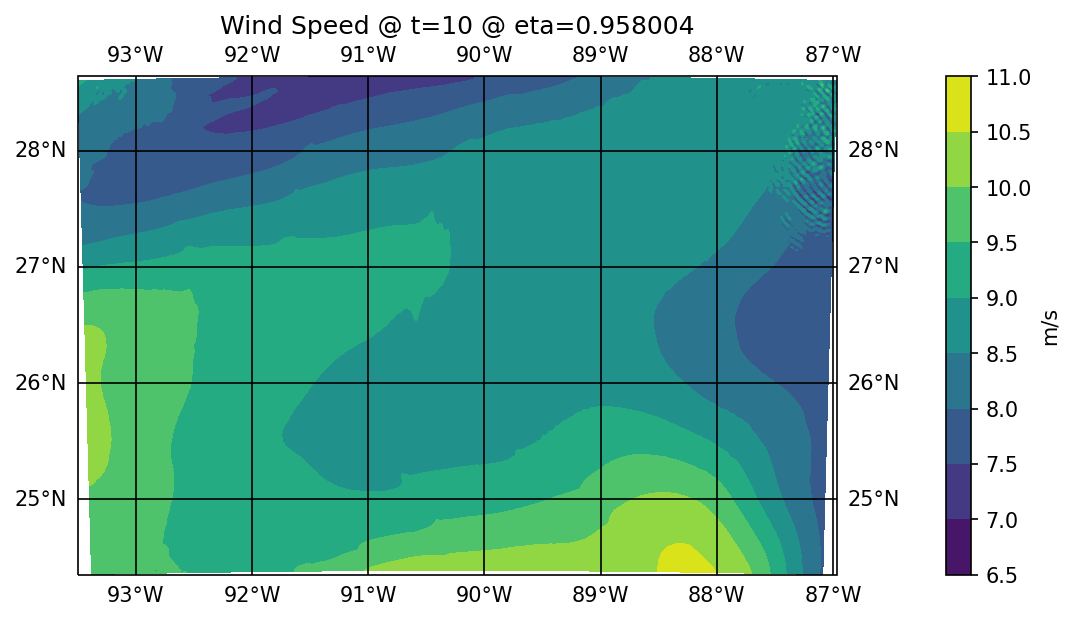

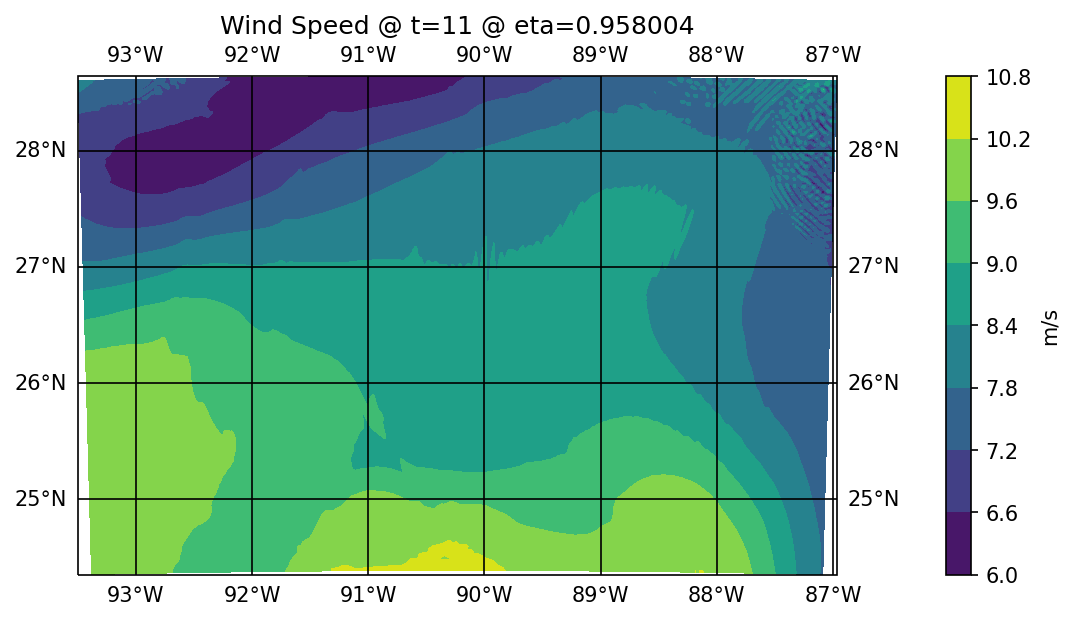

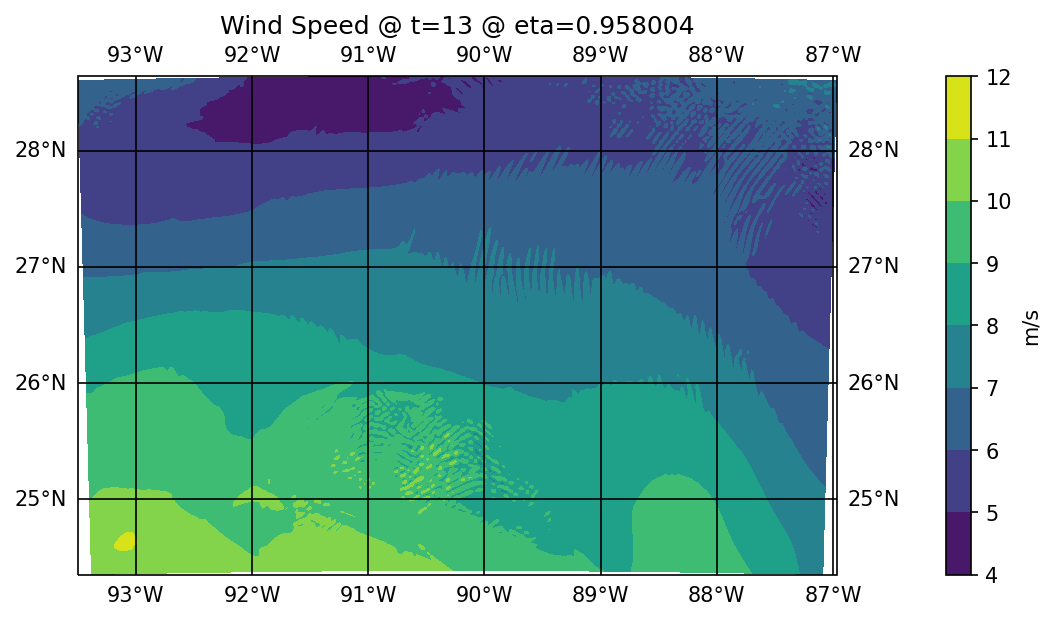

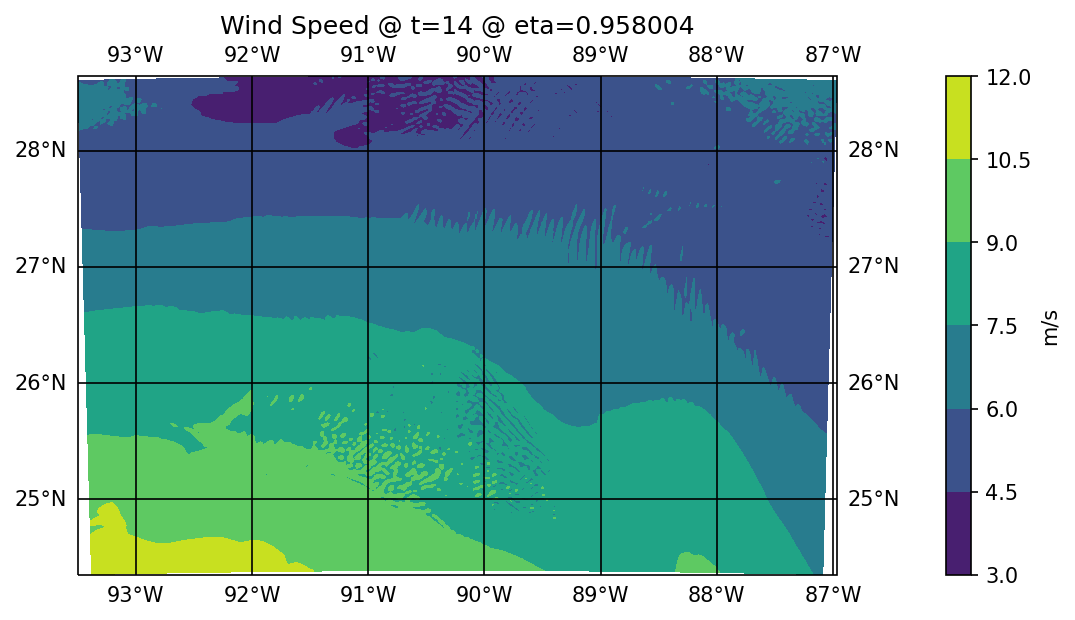

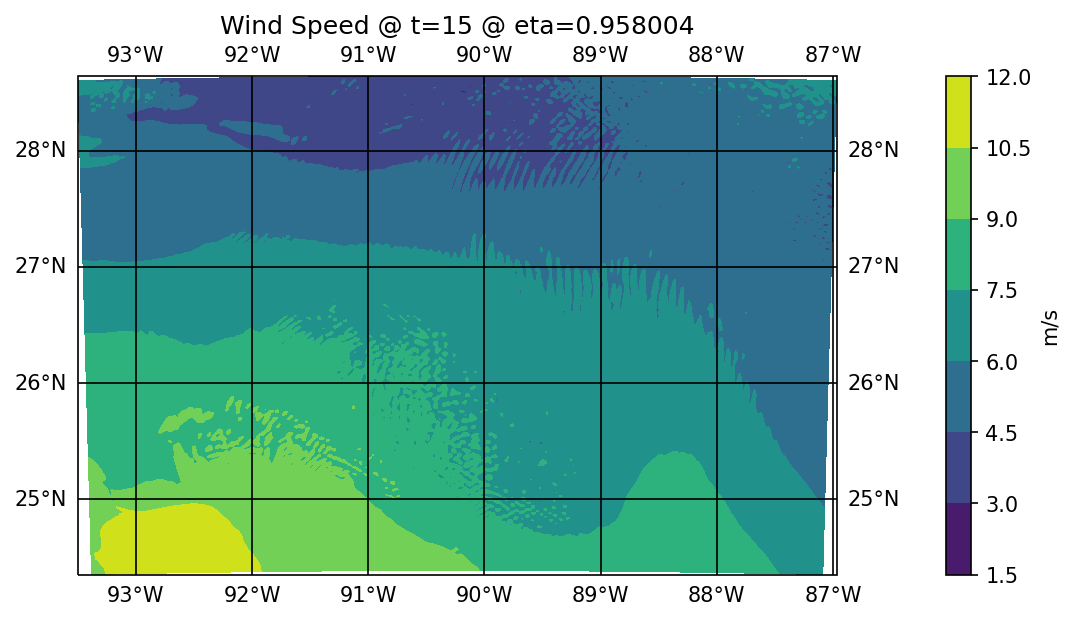

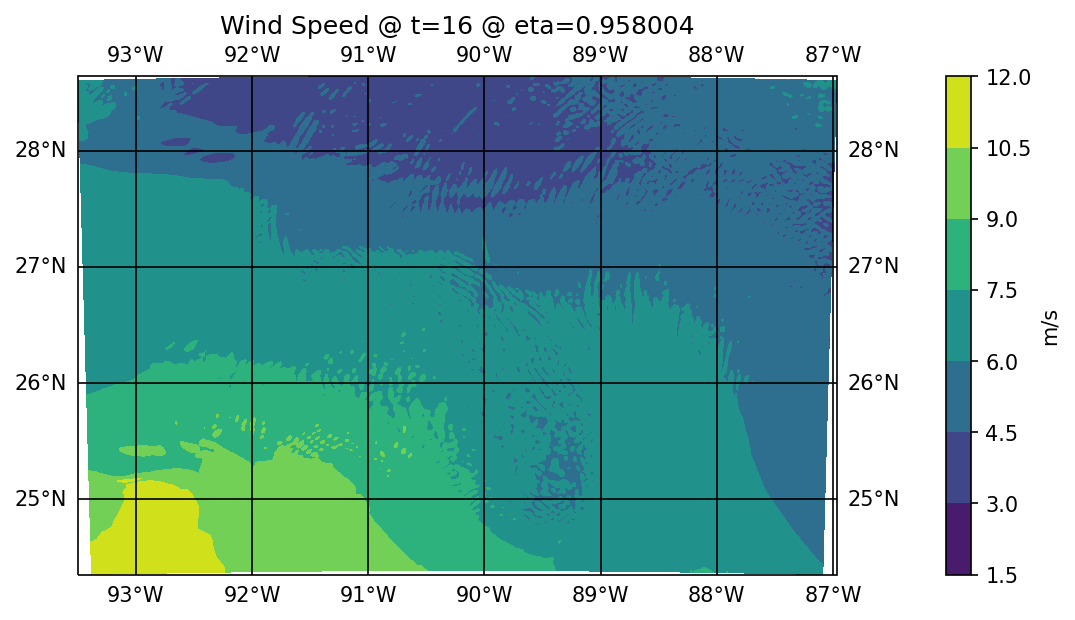

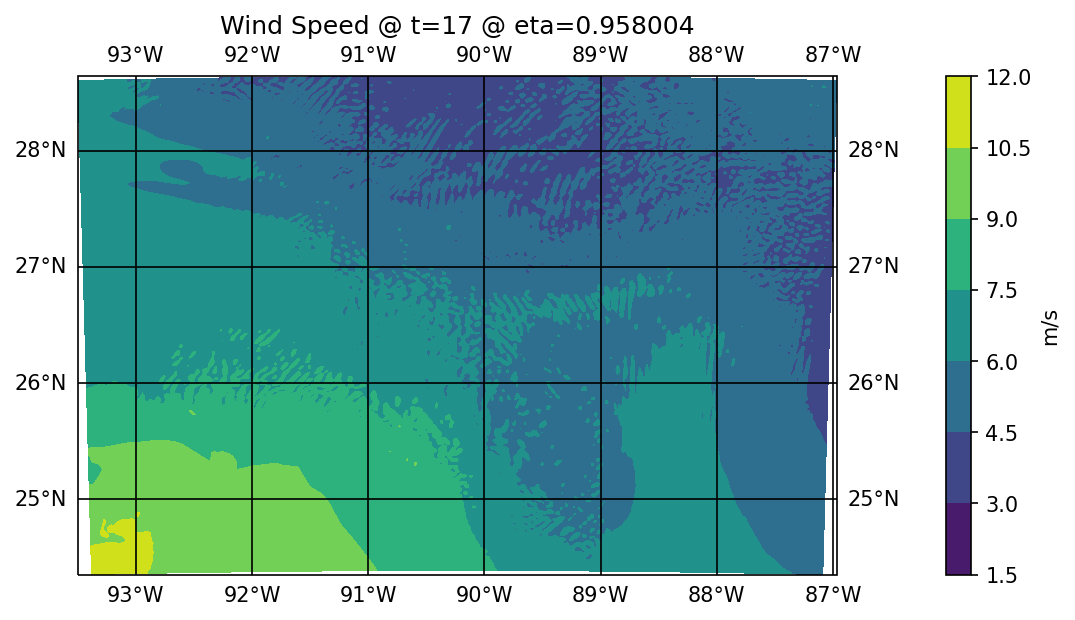

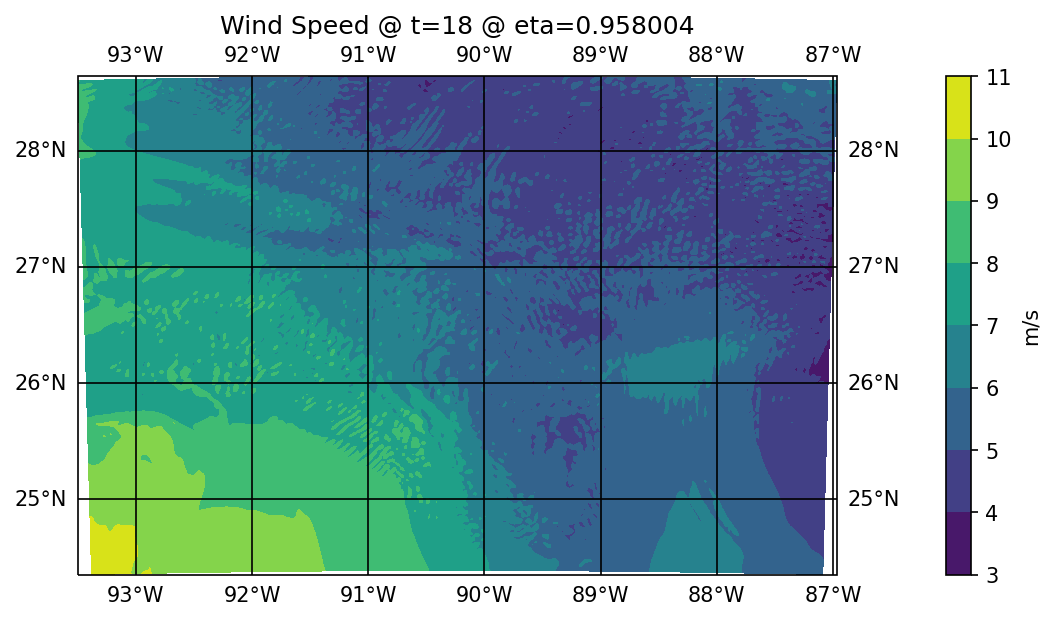

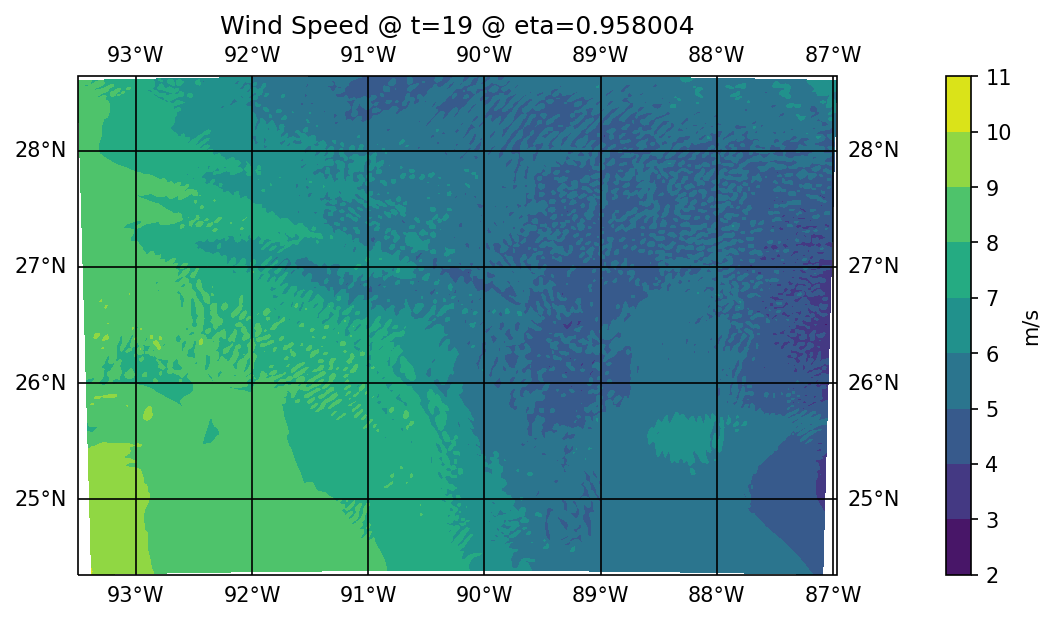

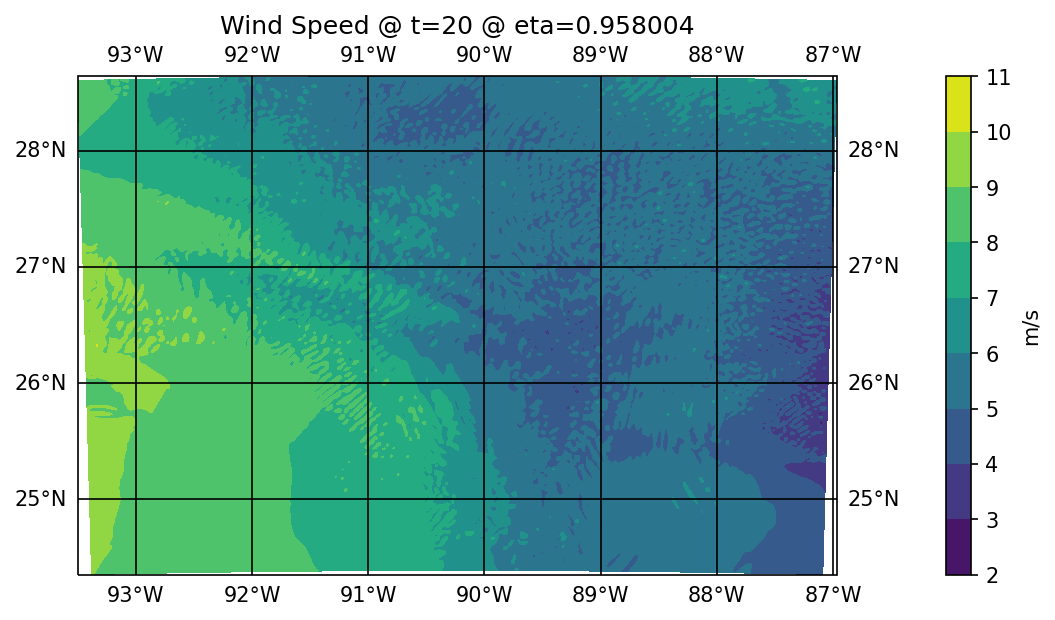

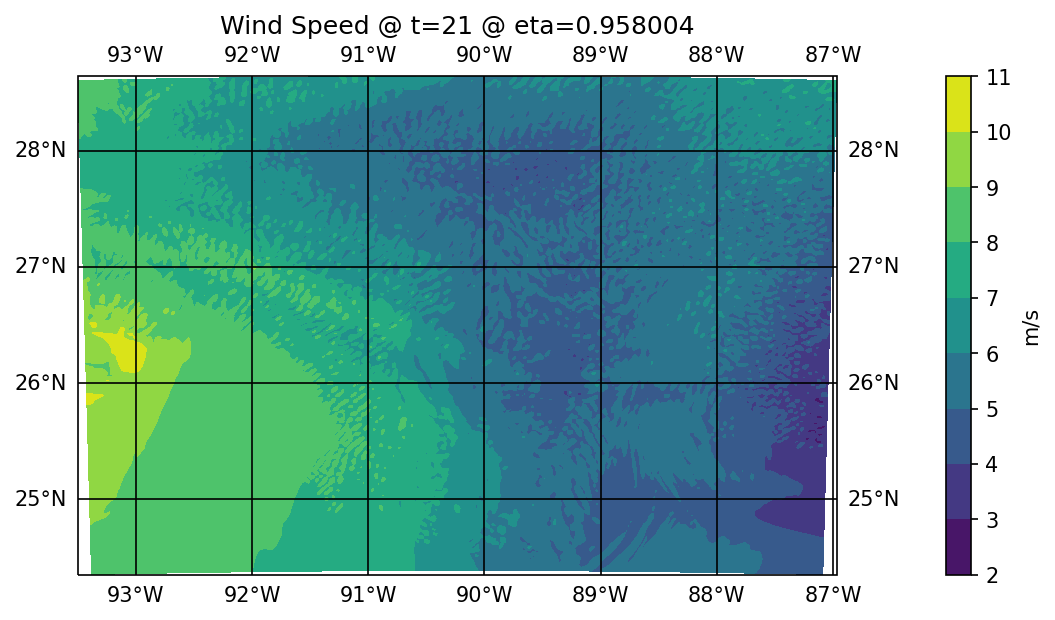

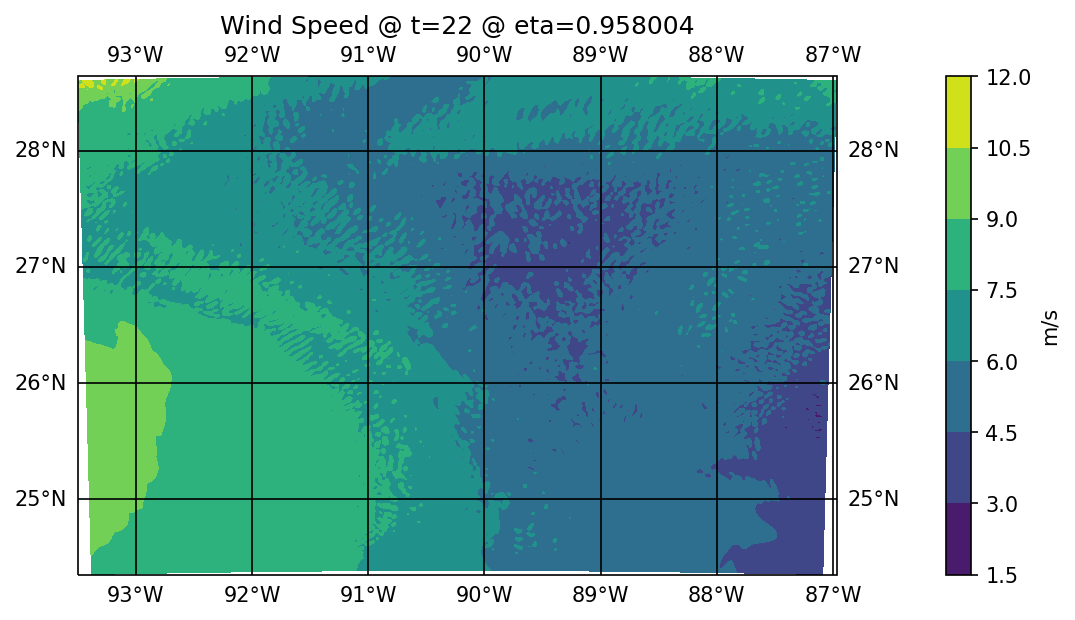

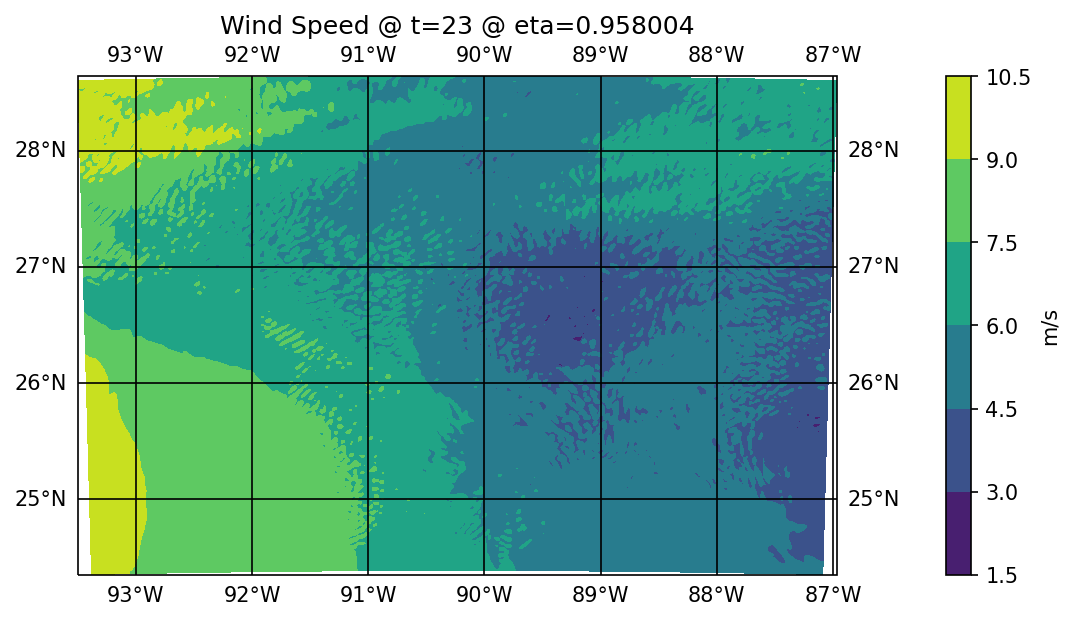

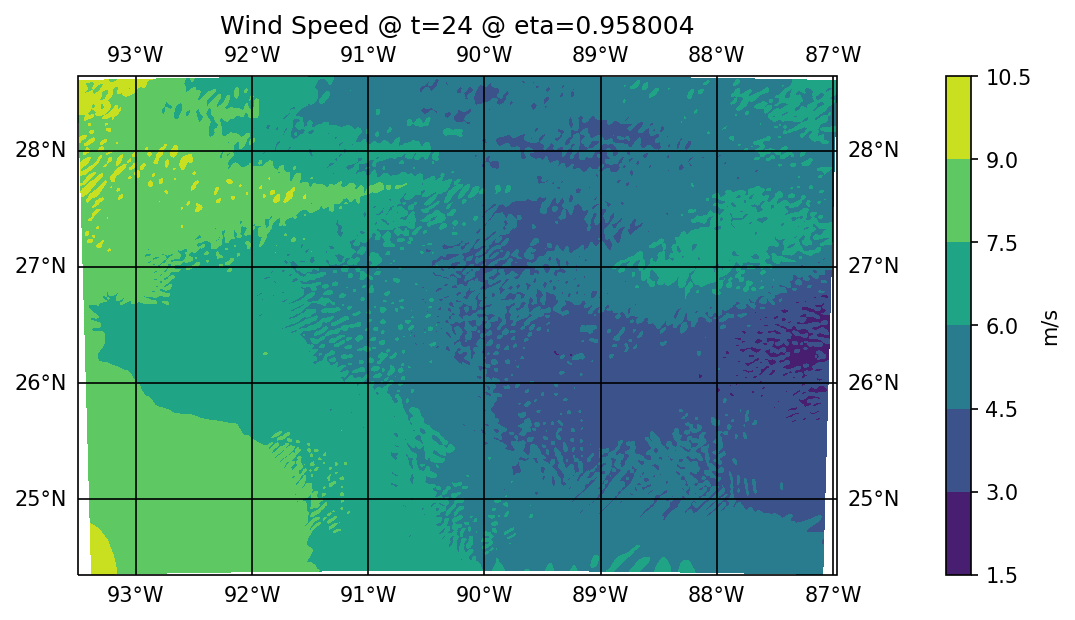

In [9]:
#wind speed, eta = 5
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed0[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=0 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed0_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed1[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=1@ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed1_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed2[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=2 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed2_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed3[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=3 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed3_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed4[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=4 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed4_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed5[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=5 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed5_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed6[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=6 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed6_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed7[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=7 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed7_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed8[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=8 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed8_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed9[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=9 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed9_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed10[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=10 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed10_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed11[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=11 @ eta=0.958004')
ssave_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed11_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed12[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=12 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed12_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed13[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=13 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed13_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed14[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=14 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed14_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed15[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=15 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed15_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed16[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=16 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed16_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed17[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=17 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed17_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed18[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=18 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed18_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed19[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=19 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed19_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed20[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=20 @ eta=0.958004')
ssave_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed20_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed21[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=21 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed21_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed22[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=22 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed22_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed23[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=23 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed23_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed24[5,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=24 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed24_eta5.png', bbox_inches = 'tight',dpi = 150)
plt.show()


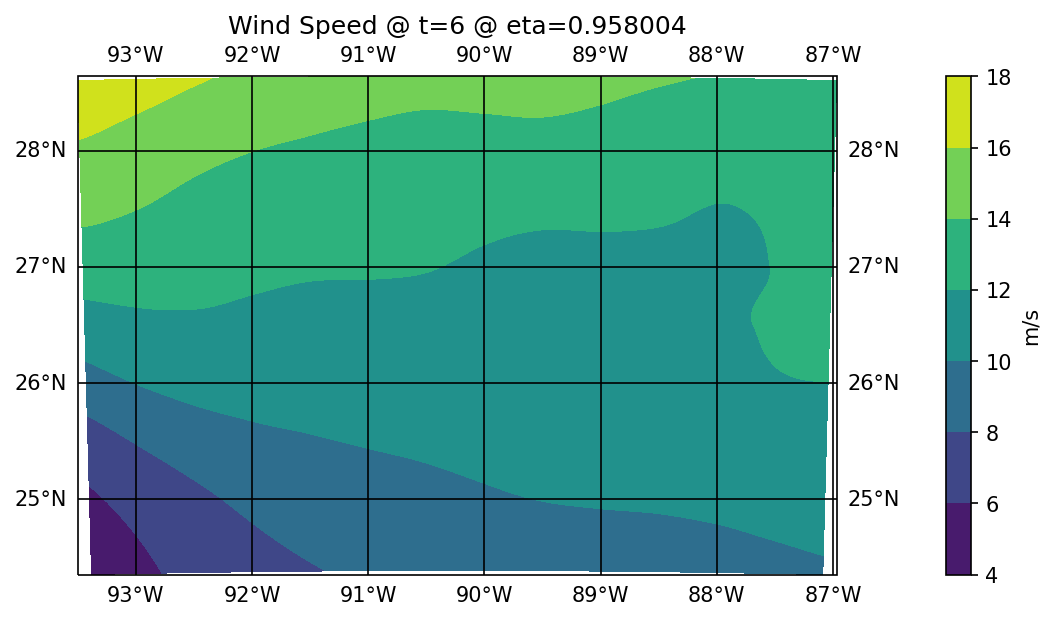

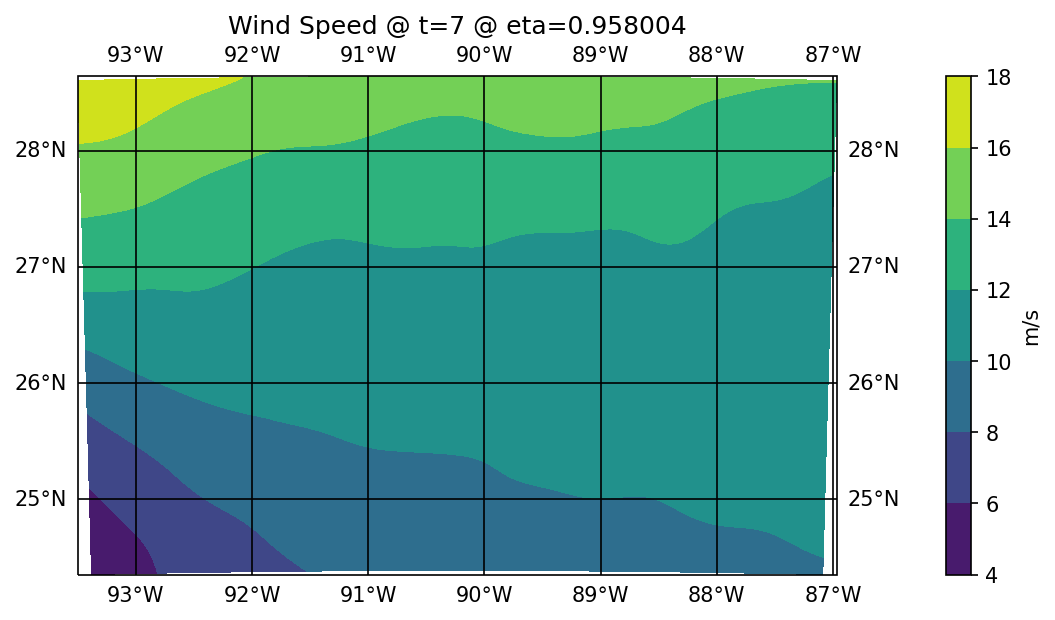

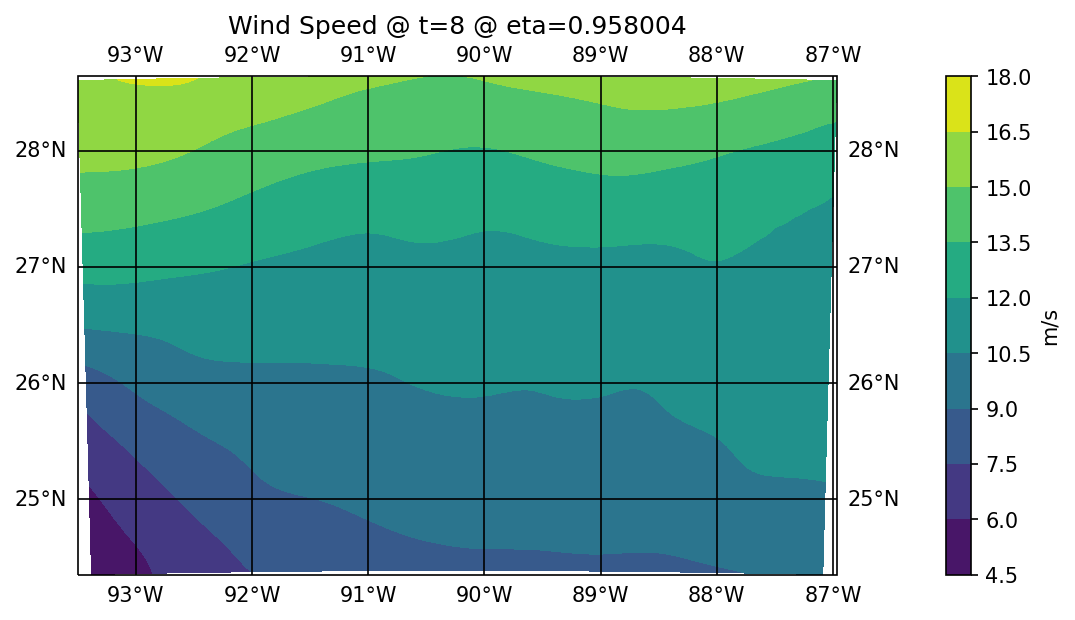

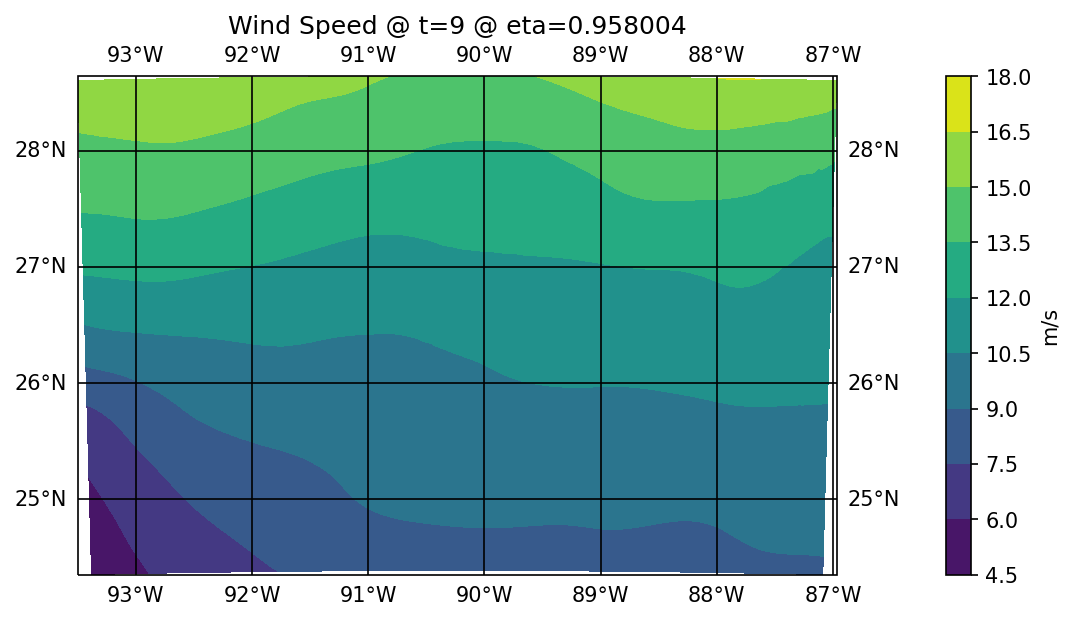

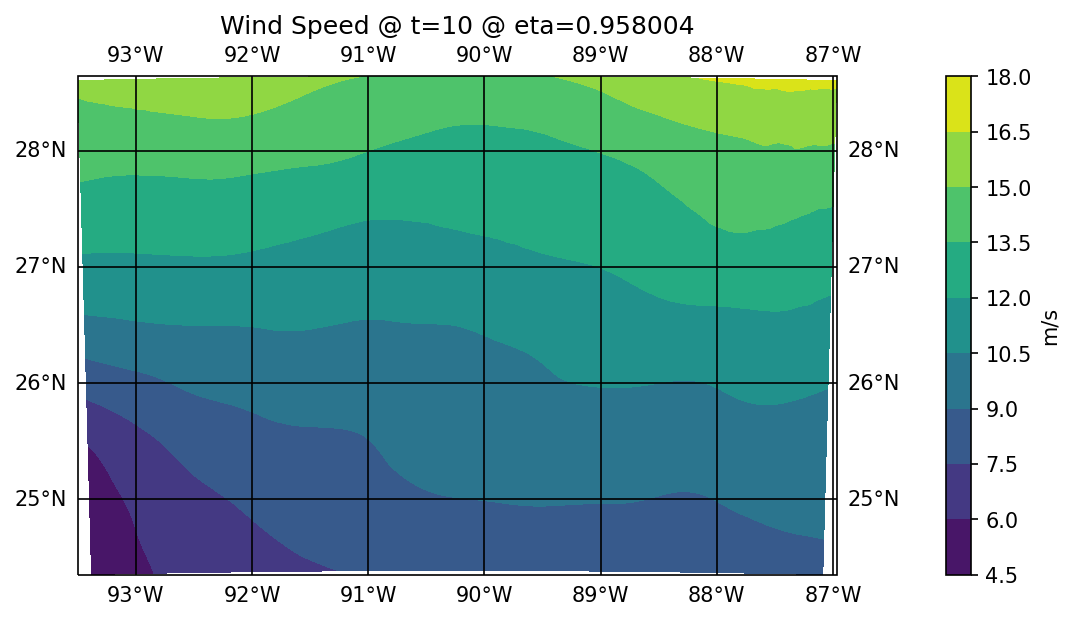

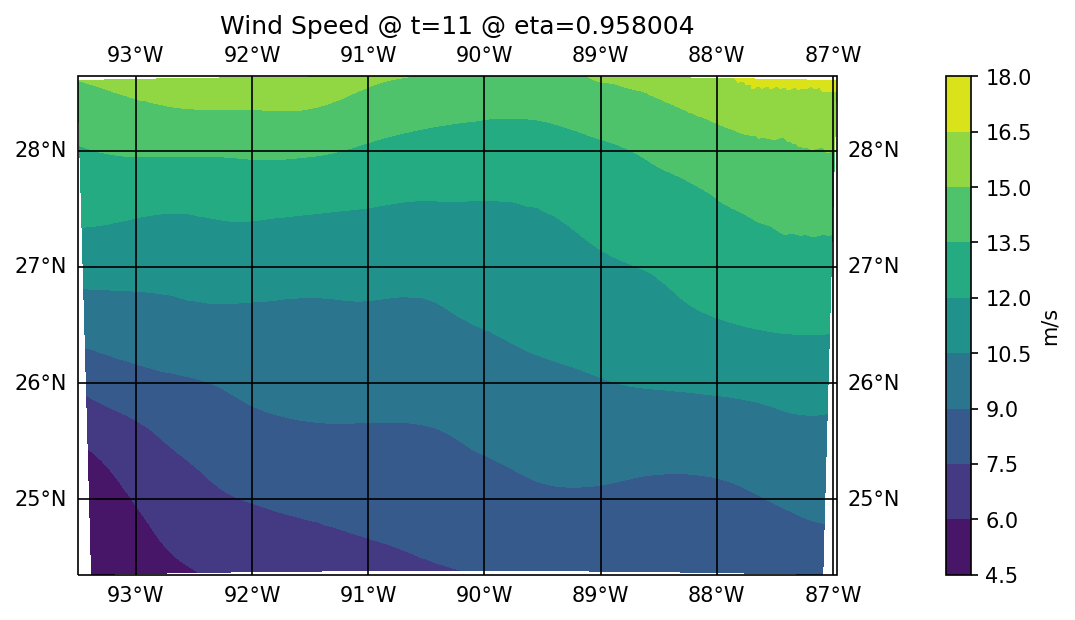

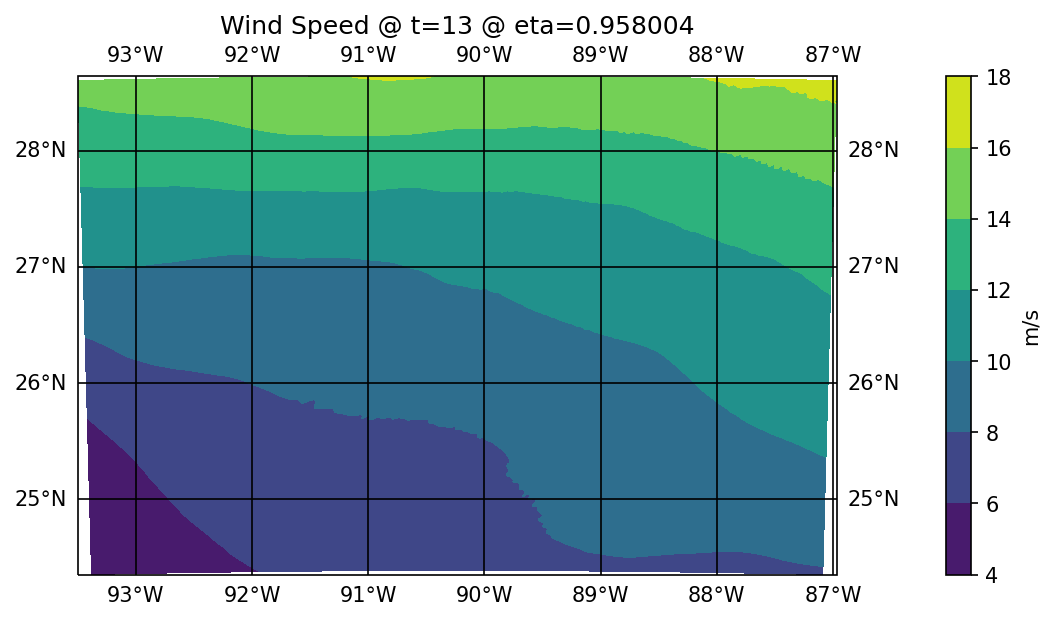

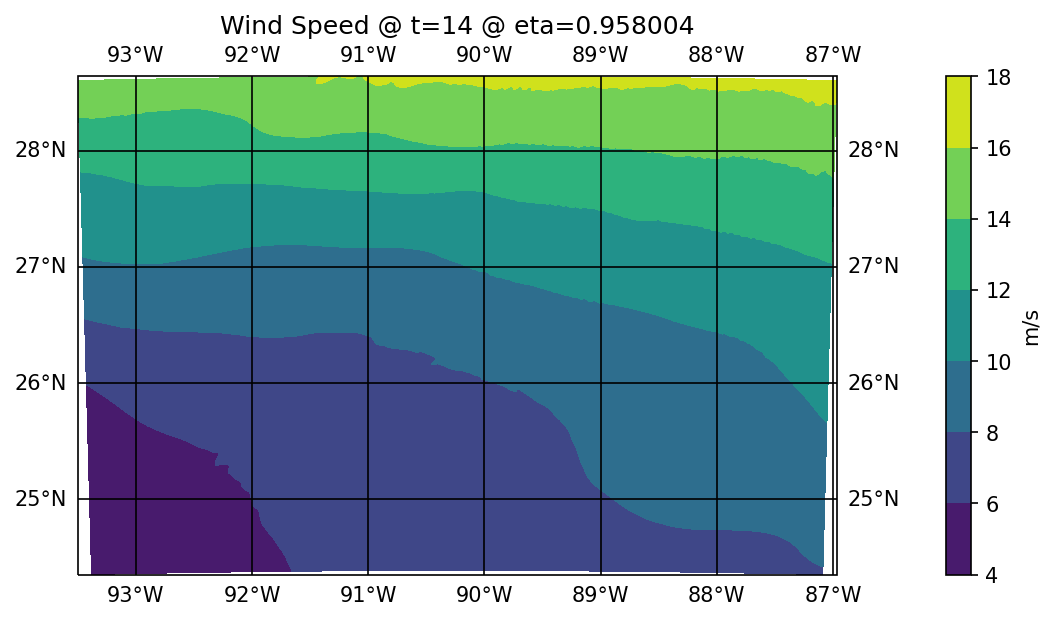

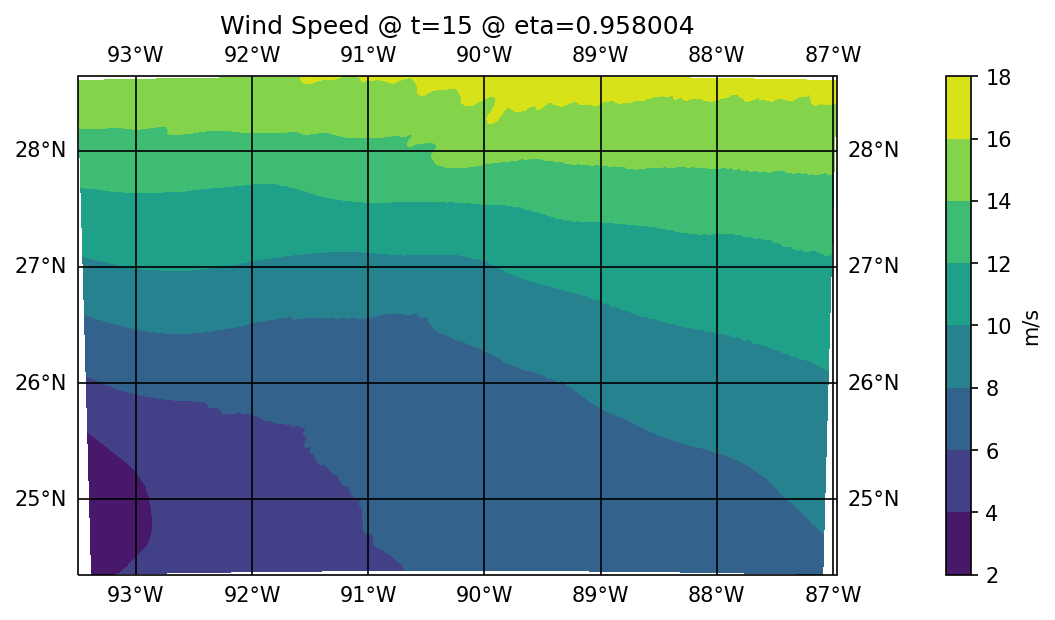

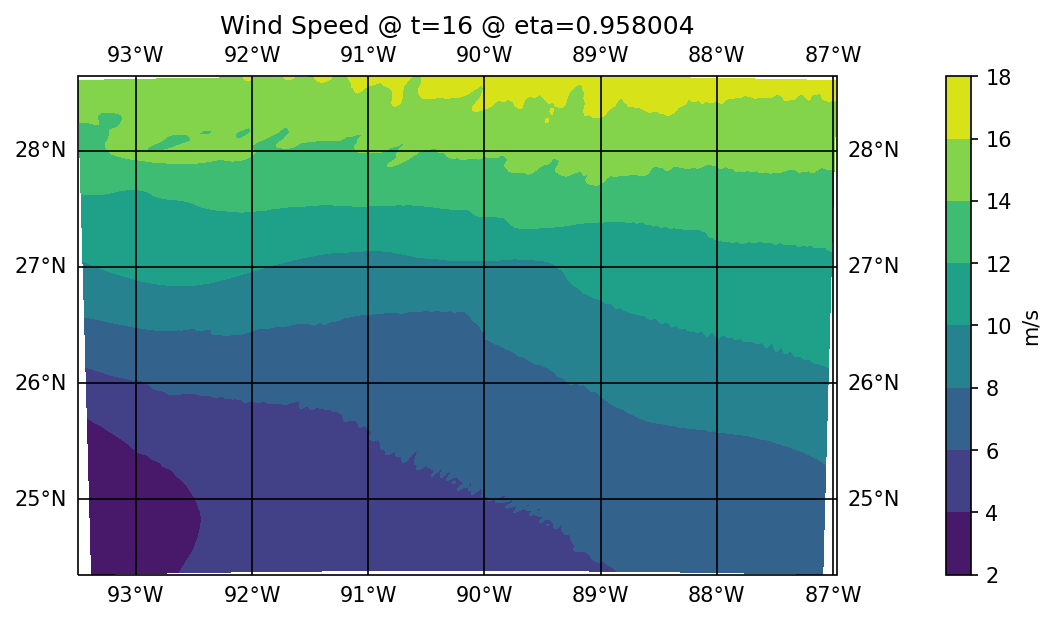

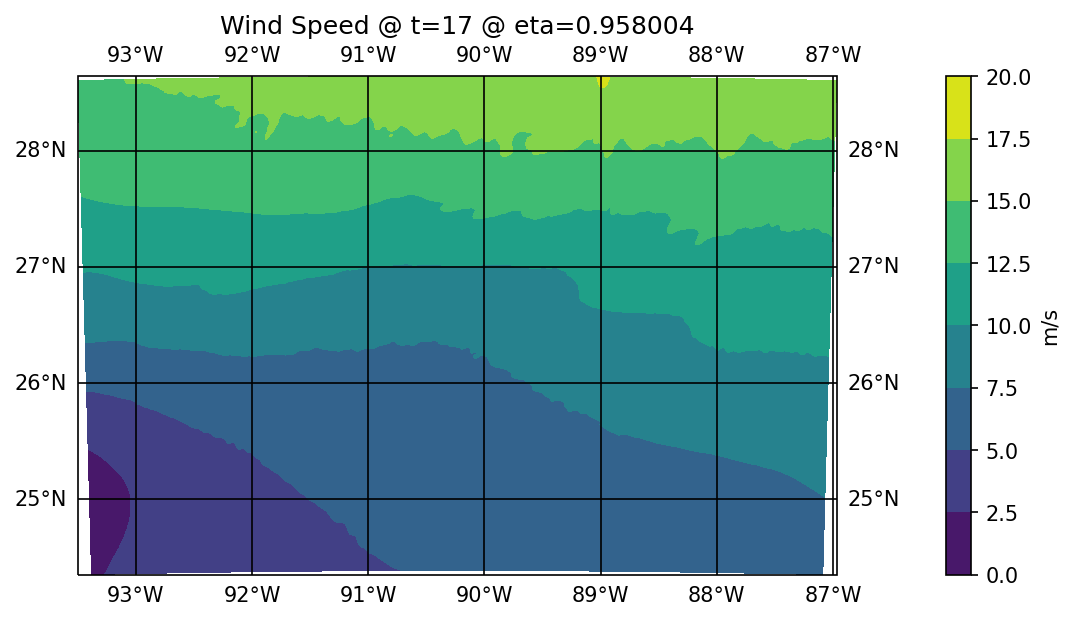

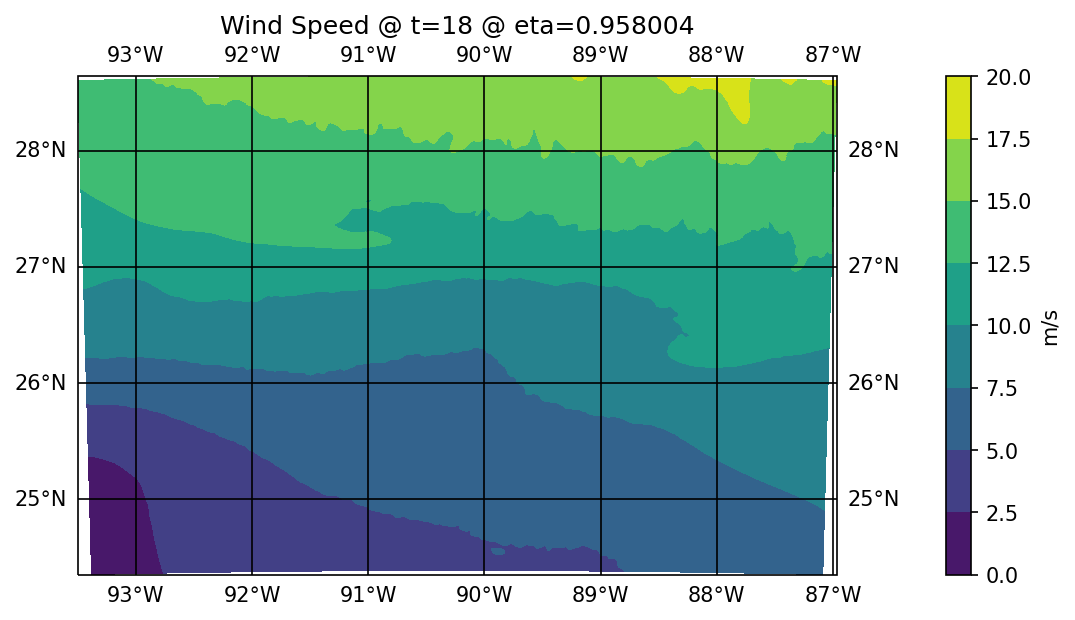

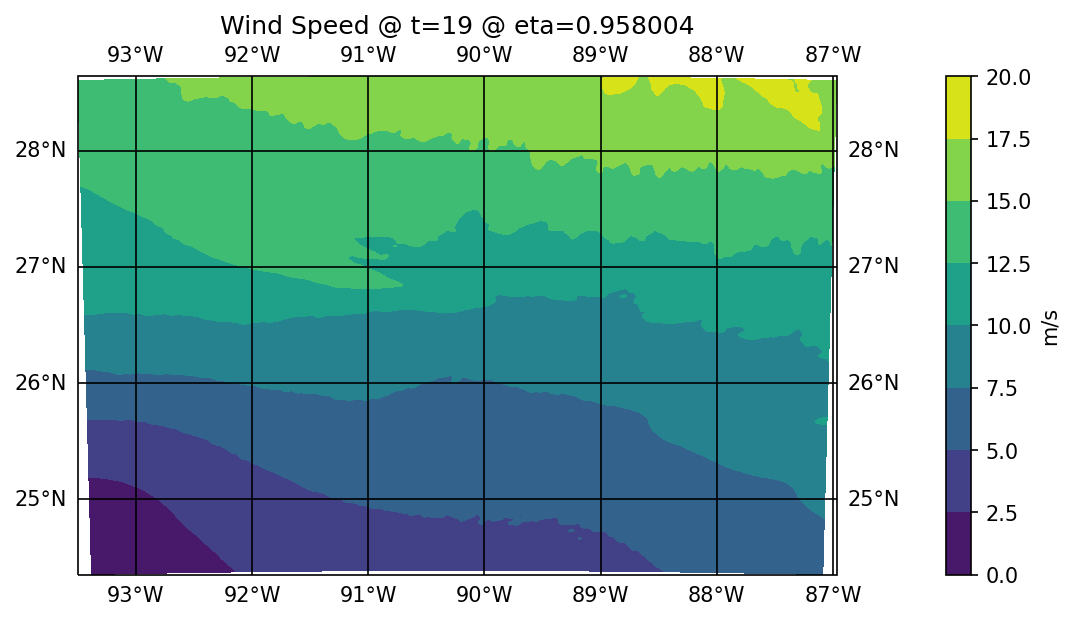

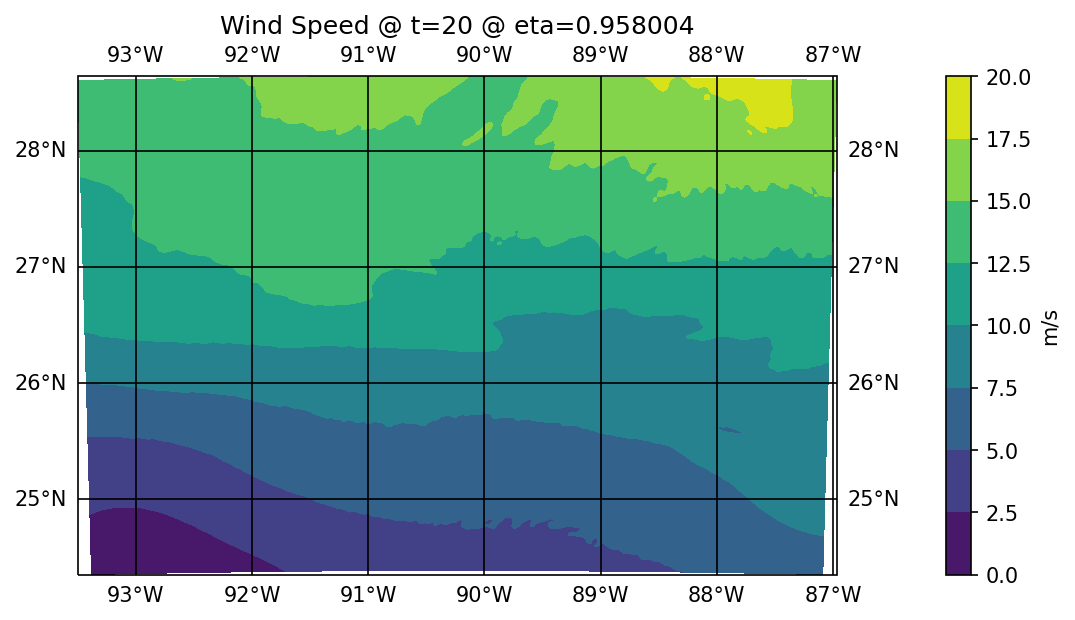

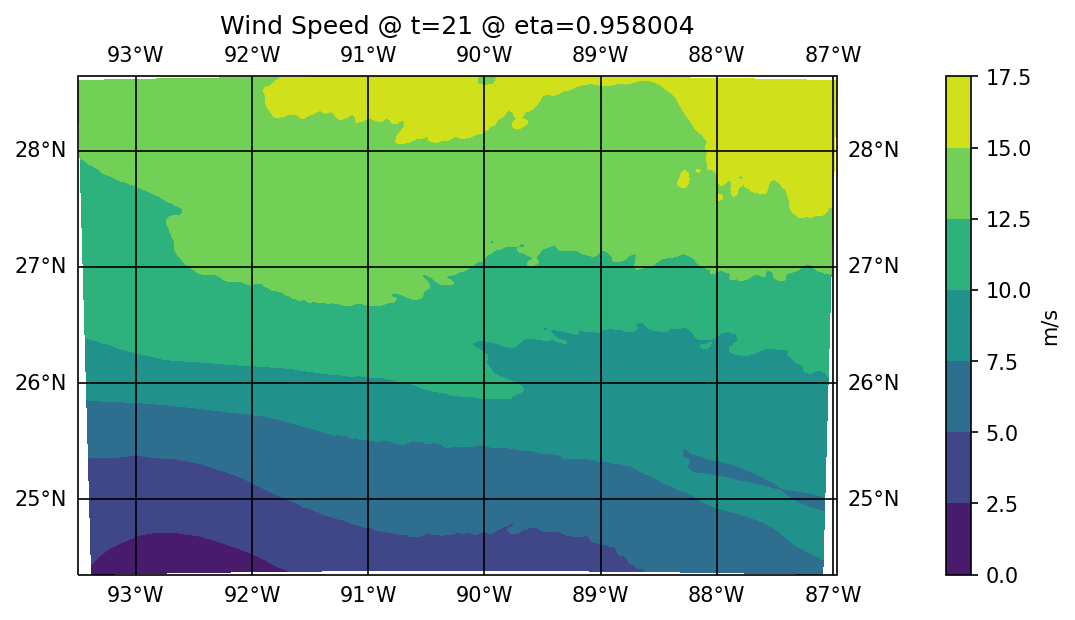

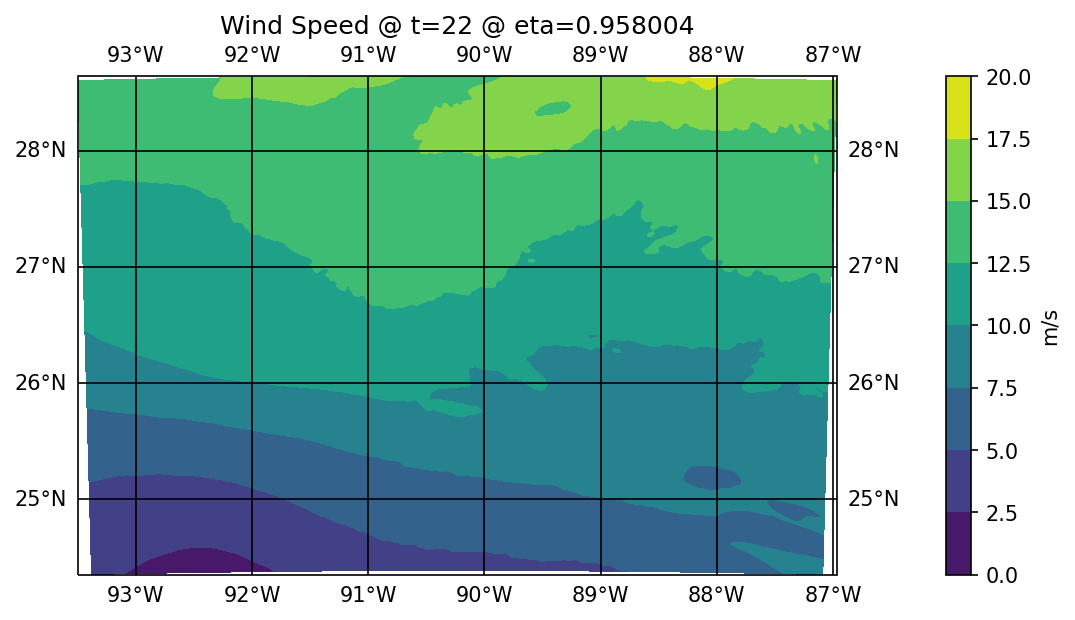

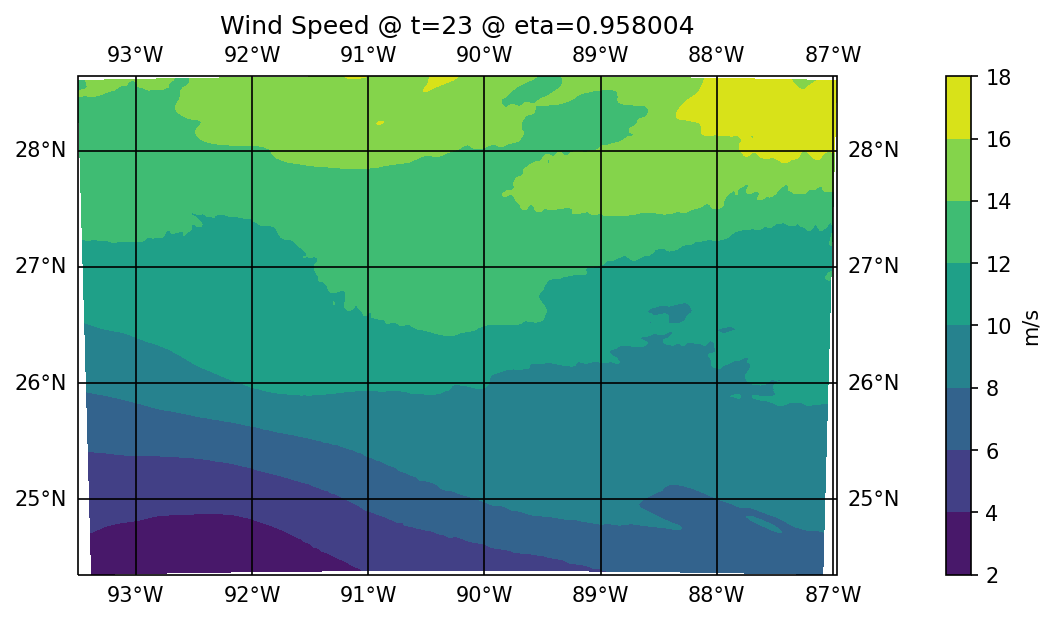

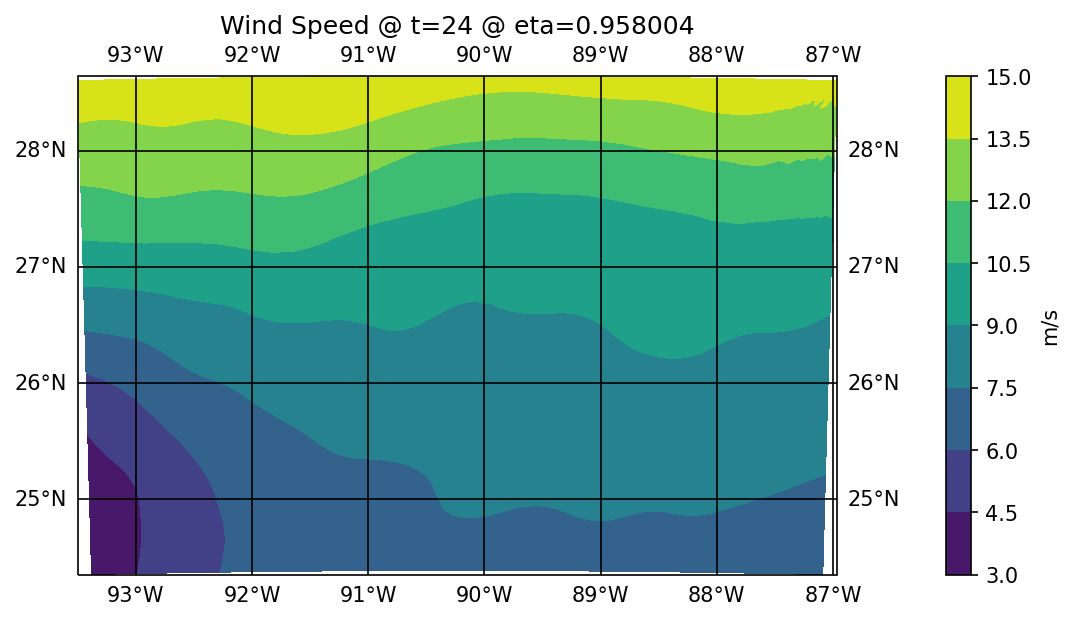

In [10]:
#wind speed eta=28
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed0[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=0 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed0_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed1[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=1 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed1_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed2[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=2 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed2_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed3[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=3 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed3_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed4[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=4 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed4_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed5[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=5 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/D3out/'
plt.savefig(save_results_to + 'WindSpeed5_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed6[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=6 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed6_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed7[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=7 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed7_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed8[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=8 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed8_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed9[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=9 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed9_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed10[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=10 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed10_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed11[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=11 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed11_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed12[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=12 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed12_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed13[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=13 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed13_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed14[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=14 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed14_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed15[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=15 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed15_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed16[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=16 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed16_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed17[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=17 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed17_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed18[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=18 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed18_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed19[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=19 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed19_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed20[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=20 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed20_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed21[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=21 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed21_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed22[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=22 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed22_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed23[28,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=23 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed23_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(xlon0[:,:], xlat0[:,:], w_speed10[24,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed @ t=24 @ eta=0.958004')
save_results_to = '/Users/Anna/Desktop/WRF/shortRun/'
plt.savefig(save_results_to + 'WindSpeed24_eta28.png', bbox_inches = 'tight',dpi = 150)
plt.show()
